#Synthetic Dataset for Risk Assignment and Loan Approval Modeling


This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. It serves two primary purposes:The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

**1.Risk Score Regression:** To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

**2.Binary Classification:** To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

#Libraries

In [ ]:
#data wrangling and manipulation
import numpy as np #for numerical computatiions and array operations
import pandas as pd #for handling and manipulating structured data

#data visualization

import matplotlib.pyplot as plt #for basic plotting
import seaborn as sns #for advanced statistical visualizations

#Data preprocessing & feature engineering
from sklearn.preprocessing import StandardScaler #standardization (mean=0,variance=1)
from sklearn.preprocessing import MinMaxScaler #normaliazation (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder #encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder #converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer #handles missing values

#Dimentionality Reduction & feature selection

from sklearn.decomposition import PCA #principal component analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif #feature selection techniques

#Model Selection and Evaluation
from sklearn.model_selection import train_test_split #splits datasets into training and test sets
from sklearn.model_selection import cross_validate #performs cross-validation
from sklearn.model_selection import KFold #k-fold cross-validation
from sklearn.model_selection import GridSearchCV #Hyperparameter tuning usung grid search

#performance metrics

from sklearn.metrics import accuracy_score #Evaluates model accuracy
from sklearn.metrics import confusion_matrix #computes confusion matrix
from sklearn.metrics import classification_report #precision,recall,F1-score summary
from sklearn.metrics import precision_score #Precision metric
from sklearn.metrics import recall_score #recall metric
from sklearn.metrics import roc_auc_score #AUC-ROC score for evaluating classifiers
from sklearn import metrics #collection of evalution metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
#Handling Imbalanced Datasets

from imblearn.over_sampling import SMOTE #Sybthetic Minority over-sampling technique (for handling class imbalance)
from sklearn.utils import class_weight #assigns weights to imbalanced classes

#Machine Learning Algorithms - Classification
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression #Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbors classifier
from sklearn.svm import SVC #support vector classifier
from sklearn.ensemble import RandomForestClassifier #random forest classifier
from sklearn.naive_bayes import GaussianNB #naive bayes classifier
from xgboost import XGBClassifier #Extreme gradient boosting classifier
from sklearn.tree import DecisionTreeClassifier #decision tree classifier
from sklearn.ensemble import ExtraTreesClassifier #extra trees classifier
from sklearn.linear_model import SGDClassifier #Stochastic Gradient Descent classifier

#Utility Funtions

from sklearn.pipeline import make_pipeline #creates machine learning pipelines
from sklearn.datasets import make_classification #generates synthetic classification datasets
from sklearn import model_selection #Various model selection utilities
from sklearn import svm  #Support Vector Machines module
from sklearn import tree #decision tree-related utilites

#models
# for regression algorithms
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#Data
https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/data.

In [ ]:
df=pd.read_csv('Loan - Loan.csv')
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179141,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


#Understanding the data

In [ ]:
df.shape

(20000, 36)

In [ ]:
df.head(10)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179141,0.070210,1,36.0
5,2018-01-06,37,178310,626,Self-Employed,Master,16,15433,72,Married,...,14859.166670,0.756079,5,27071,0.217433,0.217601,385.577074,0.075211,1,44.0
6,2018-01-07,58,51250,564,Employed,High School,39,12741,48,Married,...,4270.833333,0.884275,5,21730,0.225741,0.205271,391.300352,0.170529,0,50.0
7,2018-01-08,49,97345,516,Employed,High School,23,19634,12,Divorced,...,8112.083333,0.933492,5,38621,0.226634,0.209113,1827.360055,0.260767,1,42.4
8,2018-01-09,34,116841,603,Employed,Bachelor,12,55353,60,Divorced,...,9736.750000,0.728397,3,7711,0.258853,0.291539,1762.199026,0.246509,0,61.0
9,2018-01-10,46,40615,612,Employed,Associate,19,25443,12,Married,...,3384.583333,0.615323,3,116812,0.184443,0.197271,2353.577424,0.903384,0,53.0


In [ ]:
df.tail(10)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19990,2072-09-24,54,96264,621,Employed,Bachelor,28,38031,48,Single,...,8022.000000,0.512786,5,2604,0.222531,0.196153,1149.516437,0.185804,1,37.6
19991,2072-09-25,34,60433,555,Employed,High School,10,11299,60,Married,...,5036.083333,0.755652,5,82320,0.238799,0.226940,316.540575,0.144466,1,42.4
19992,2072-09-26,50,34282,578,Employed,High School,27,28489,48,Single,...,2856.833333,0.839598,2,10790,0.234489,0.243943,935.014359,0.479557,0,58.0
19993,2072-09-27,50,30578,588,Employed,Bachelor,29,14654,48,Single,...,2548.166667,0.889639,3,3445,0.215654,0.188936,437.333829,0.225391,0,60.0
19994,2072-09-28,51,33354,562,Employed,High School,30,22082,36,Single,...,2779.500000,0.923075,12,228771,0.226082,0.248882,876.671298,0.383764,0,50.0
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0
19999,2072-10-03,20,53227,574,Employed,Associate,0,32055,48,Married,...,4435.583333,0.853801,5,41372,0.240055,0.242693,1049.830407,0.298006,0,59.0


In [ ]:
df.sample(10)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
16629,2063-07-13,40,72386,625,Employed,Bachelor,21,25120,48,Married,...,6032.166667,0.772231,5,8899,0.207620,0.203020,768.458228,0.208459,0,52.0
5721,2033-08-31,60,57552,510,Employed,Bachelor,38,22688,108,Married,...,4796.000000,0.507862,5,33022,0.312688,0.265055,553.408738,0.289285,0,55.0
9299,2043-06-18,27,42263,545,Employed,Bachelor,3,50933,12,Single,...,3521.916667,0.714975,6,197213,0.243433,0.262491,4871.811728,1.446602,0,47.0
14753,2058-05-24,21,16169,512,Employed,High School,0,17503,36,Married,...,1347.416667,0.688774,4,81258,0.246503,0.219227,667.747645,0.933451,0,51.0
9286,2043-06-05,45,66683,651,Self-Employed,Master,24,10293,108,Married,...,5556.916667,0.900903,5,3675,0.229793,0.231001,227.108883,0.163959,0,51.0
8893,2042-05-08,27,25488,543,Employed,Associate,3,24036,120,Married,...,2124.000000,0.868830,6,117233,0.307536,0.322131,673.259642,0.395132,0,56.0
19620,2071-09-20,60,61595,560,Employed,Associate,34,19719,36,Single,...,5132.916667,0.905114,5,2373,0.224719,0.218077,751.117075,0.179453,1,40.8
10704,2047-04-23,47,15000,607,Employed,High School,23,7880,60,Married,...,1250.000000,0.873462,3,8009,0.209380,0.250660,231.593256,0.445275,0,52.0
14826,2058-08-05,45,89047,434,Employed,Associate,21,17194,60,Divorced,...,7420.583333,0.943925,3,263740,0.305194,0.323964,581.855891,0.128407,1,40.0
10887,2047-10-23,29,85865,469,Self-Employed,Associate,2,29061,84,Married,...,7155.416667,0.479954,6,5657,0.319561,0.337304,905.051938,0.186300,0,53.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [ ]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770758,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [ ]:
df.describe(include=['O'])

,ApplicationDate,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
count,20000,20000,20000,20000,20000,20000
unique,20000,3,5,4,4,5
top,2072-09-17,Employed,Bachelor,Married,Mortgage,Home
freq,1,17036,6054,10041,7939,5925


In [ ]:
print("The features of the datasetare:")
featrue=len(df.columns)
feature_list=[feature for feature in df.columns]
for feature in feature_list:
  print(feature)

The features of the datasetare:
ApplicationDate
Age
AnnualIncome
CreditScore
EmploymentStatus
EducationLevel
Experience
LoanAmount
LoanDuration
MaritalStatus
NumberOfDependents
HomeOwnershipStatus
MonthlyDebtPayments
CreditCardUtilizationRate
NumberOfOpenCreditLines
NumberOfCreditInquiries
DebtToIncomeRatio
BankruptcyHistory
LoanPurpose
PreviousLoanDefaults
PaymentHistory
LengthOfCreditHistory
SavingsAccountBalance
CheckingAccountBalance
TotalAssets
TotalLiabilities
MonthlyIncome
UtilityBillsPaymentHistory
JobTenure
NetWorth
BaseInterestRate
InterestRate
MonthlyLoanPayment
TotalDebtToIncomeRatio
LoanApproved
RiskScore


Explanation of the features in the dataset:

1. **ApplicationDate**: The date when the loan application was submitted.
2. **Age**: The age of the loan applicant.
3. **AnnualIncome**: The yearly income of the applicant, typically used to evaluate loan repayment capacity.
4. **CreditScore**: A numerical representation of the applicant’s creditworthiness based on their credit history.
5. **EmploymentStatus**: The current employment status of the applicant (e.g., employed, unemployed, self-employed).
6. **EducationLevel**: The highest level of education attained by the applicant.
7. **Experience**: The number of years the applicant has been in their current occupation or field.
8. **LoanAmount**: The amount of money the applicant is requesting as a loan.
9. **LoanDuration**: The period (in months or years) over which the loan is to be repaid.
10. **MaritalStatus**: The marital status of the applicant (e.g., single, married, divorced).
11. **NumberOfDependents**: The number of people financially dependent on the applicant (e.g., children, elderly parents).
12. **HomeOwnershipStatus**: Whether the applicant owns, rents, or has other living arrangements regarding their home.
13. **MonthlyDebtPayments**: The total amount the applicant is currently paying each month toward their existing debts.
14. **CreditCardUtilizationRate**: The percentage of available credit being used by the applicant (credit card balance divided by total credit limit).
15. **NumberOfOpenCreditLines**: The number of active credit accounts the applicant has (e.g., credit cards, loans).
16. **NumberOfCreditInquiries**: The number of times a credit inquiry has been made on the applicant’s account (usually when applying for credit).
17. **DebtToIncomeRatio**: The ratio of the applicant’s total monthly debt payments to their monthly income, used to assess their ability to take on more debt.
18. **BankruptcyHistory**: Indicates whether the applicant has filed for bankruptcy in the past.
19. **LoanPurpose**: The reason why the applicant is seeking the loan (e.g., home improvement, education, medical).
20. **PreviousLoanDefaults**: The number of times the applicant has defaulted on previous loans.
21. **PaymentHistory**: A record of the applicant’s past payments on loans and credit lines.
22. **LengthOfCreditHistory**: The number of years the applicant has had active credit accounts.
23. **SavingsAccountBalance**: The amount of money in the applicant’s savings account.
24. **CheckingAccountBalance**: The amount of money in the applicant’s checking account.
25. **TotalAssets**: The total value of assets owned by the applicant (e.g., property, vehicles, investments).
26. **TotalLiabilities**: The total amount of liabilities (debts) the applicant owes.
27. **MonthlyIncome**: The applicant’s total monthly income.
28. **UtilityBillsPaymentHistory**: A record of how well the applicant has managed paying their utility bills.
29. **JobTenure**: The length of time the applicant has held their current job.
30. **NetWorth**: The difference between the applicant’s total assets and total liabilities.
31. **BaseInterestRate**: The general interest rate set by the financial institution or the market.
32. **InterestRate**: The specific interest rate offered to the applicant for the loan.
33. **MonthlyLoanPayment**: The amount the applicant will need to pay each month to repay the loan.
34. **TotalDebtToIncomeRatio**: A more comprehensive debt-to-income ratio that includes all of the applicant’s liabilities.
35. **`LoanApproved`**: Indicates whether the loan was approved or not (usually binary: Yes/No).
36. **`RiskScore`**: A score representing the risk level of the applicant, usually derived from various financial and personal factors to help determine loan approval and interest rate.

These features help in assessing the financial health, creditworthiness, and risk profile of the loan applicant, which ultimately determines loan approval, terms, and interest rates.

#Data Visualizations

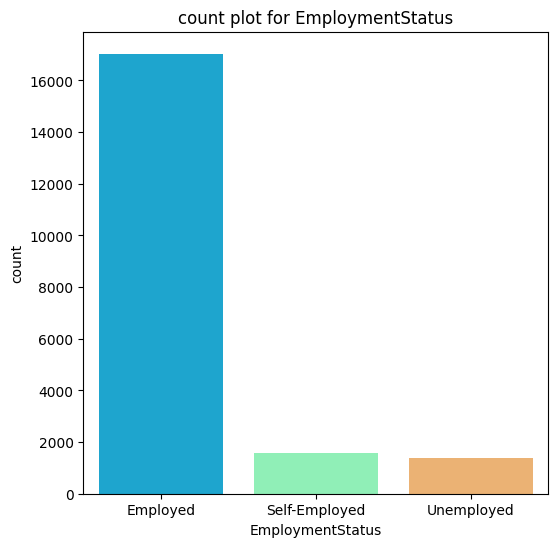

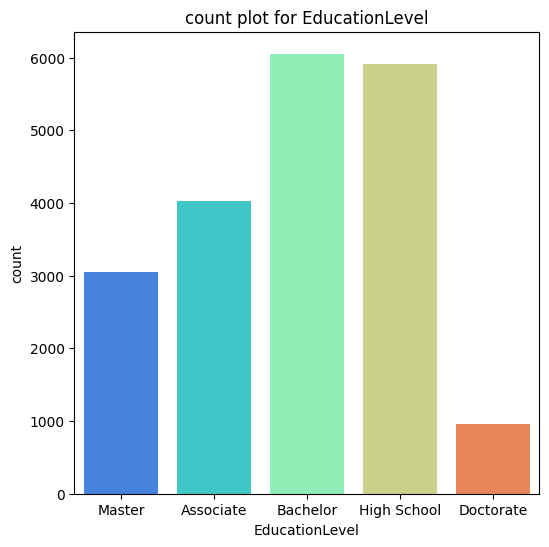

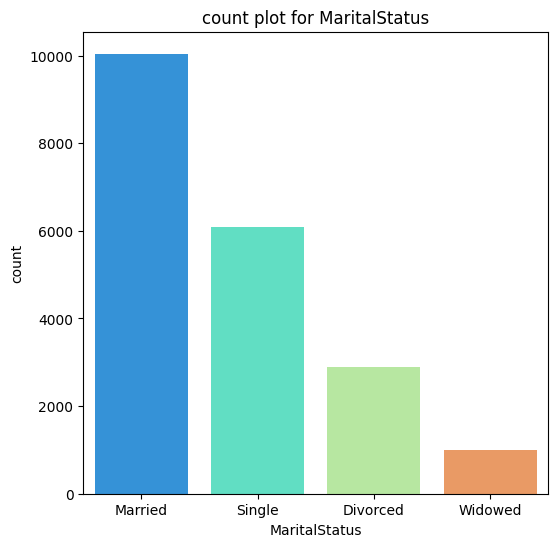

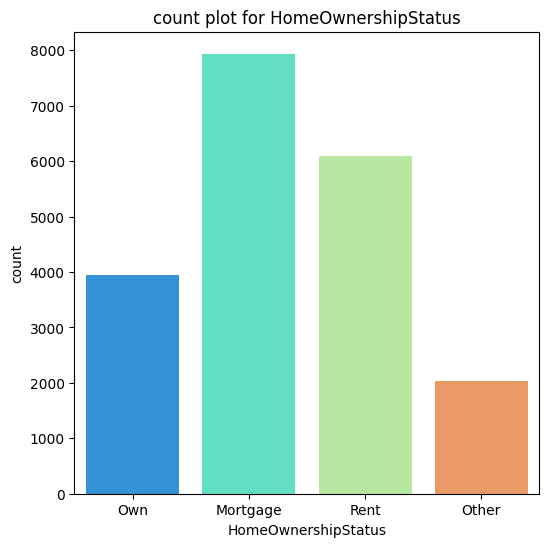

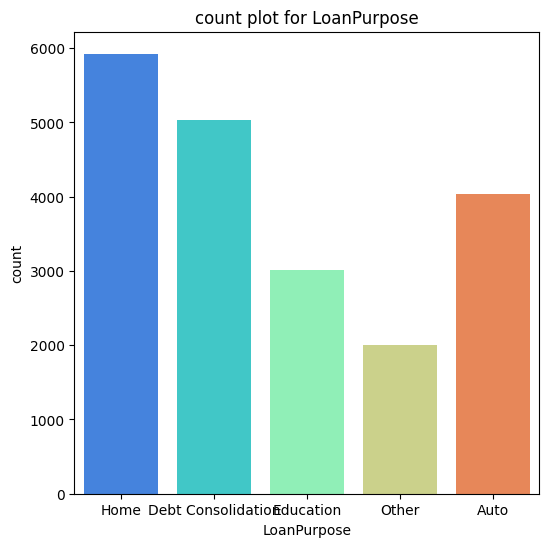

In [ ]:
categorical_columns=df.select_dtypes(include=["object","category"]).columns.tolist()
for col in categorical_columns[1:]:
  plt.figure(figsize=(6,6))
  sns.countplot(data=df,x=col,hue=col,palette="rainbow")
  plt.title(f"count plot for {col}")
  plt.show()

Most of the loan needed persons are
* Employed
* Married
* Comparictivly less educated
* Need loan for building home.

##categorical column

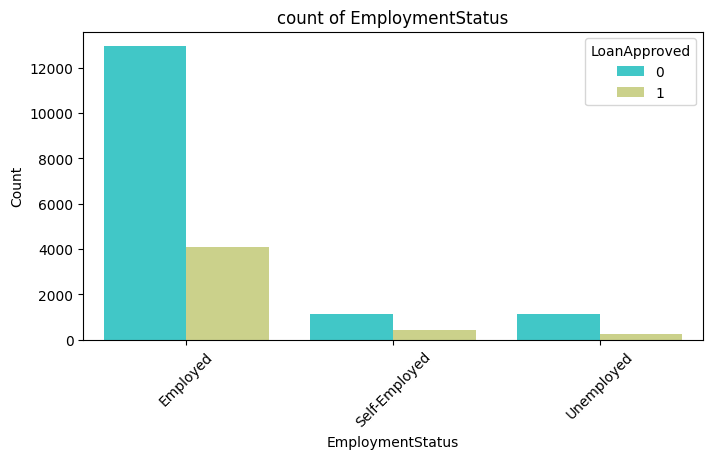

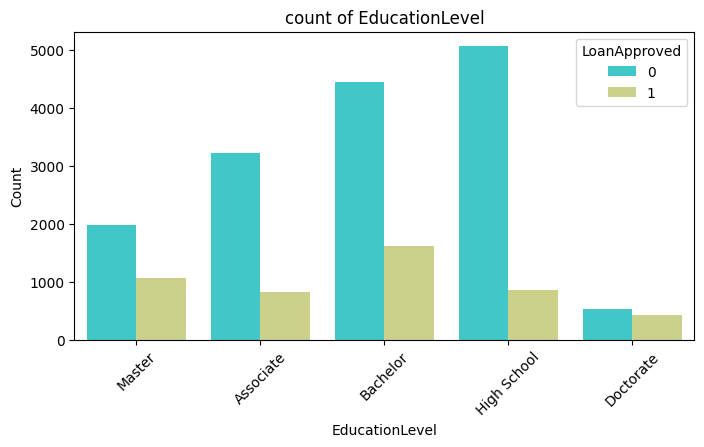

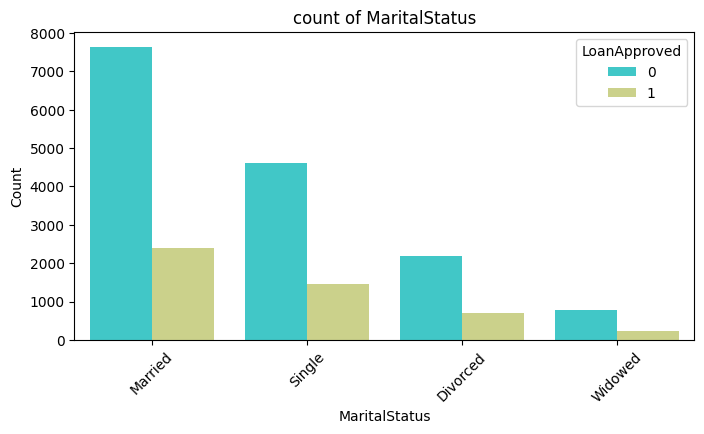

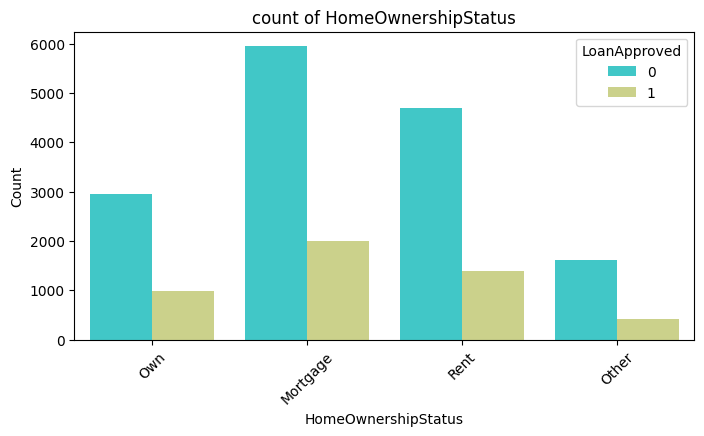

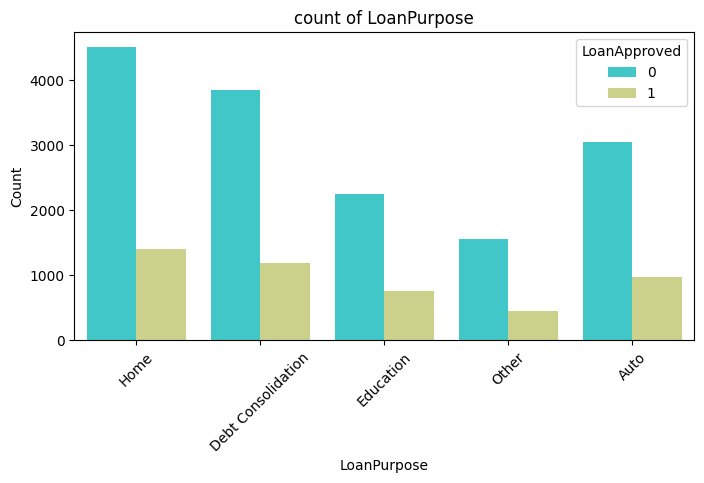

In [ ]:
categorical_columns=df.select_dtypes(include=["object","category"]).columns.tolist()
for col in categorical_columns[1:]:
  plt.figure(figsize=(8,4))
  sns.countplot(data=df,x=col,hue="LoanApproved",palette="rainbow")
  plt.title(f"count of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.xticks(rotation=45)
  plt.show()

majority of  loan requests are rejucted in all categories(there might be some  other reason affecting the riskscore):

##Numarical columns

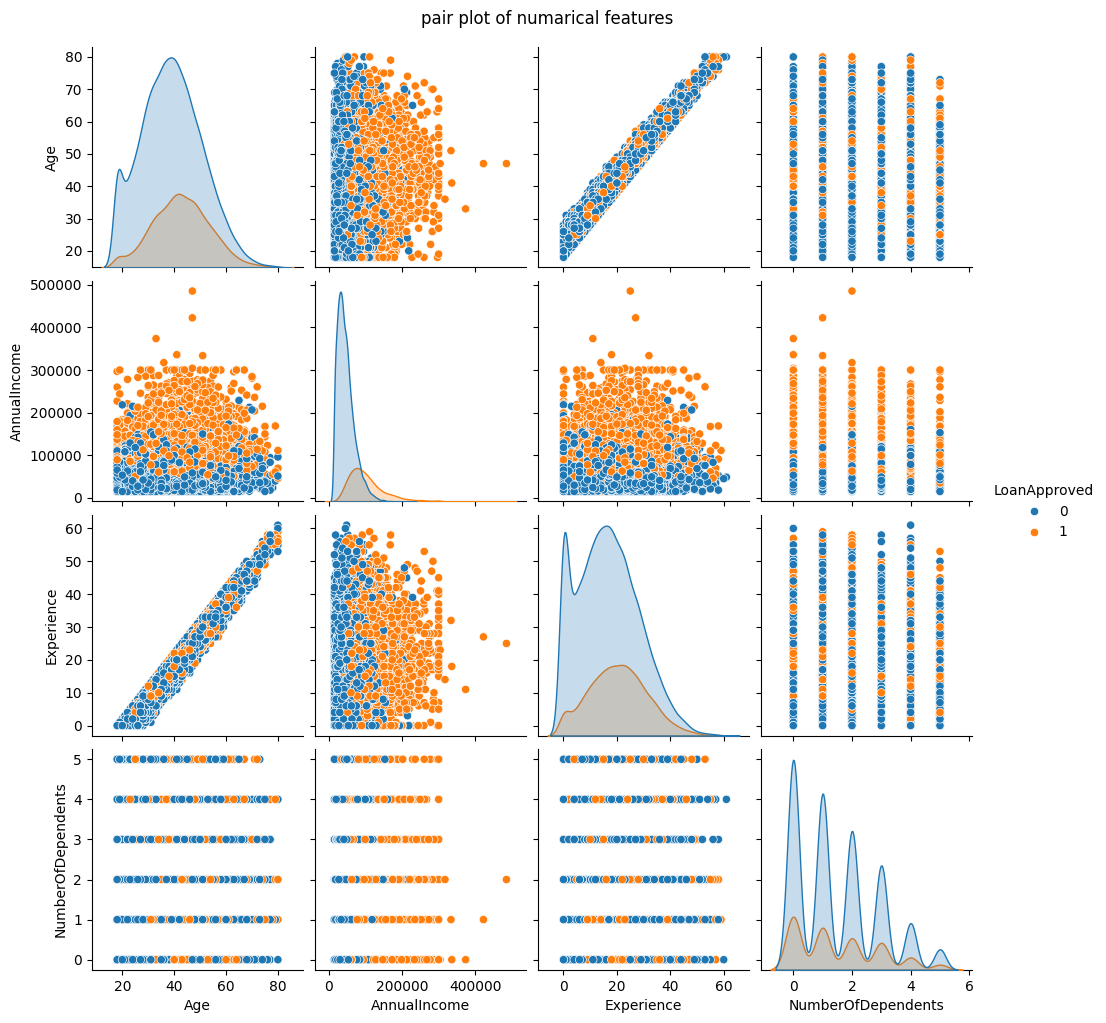

In [ ]:
sns.pairplot(df[["Age","AnnualIncome","Experience","NumberOfDependents","LoanApproved"]],hue="LoanApproved")
plt.suptitle("pair plot of numarical features",y=1.02)
plt.show()

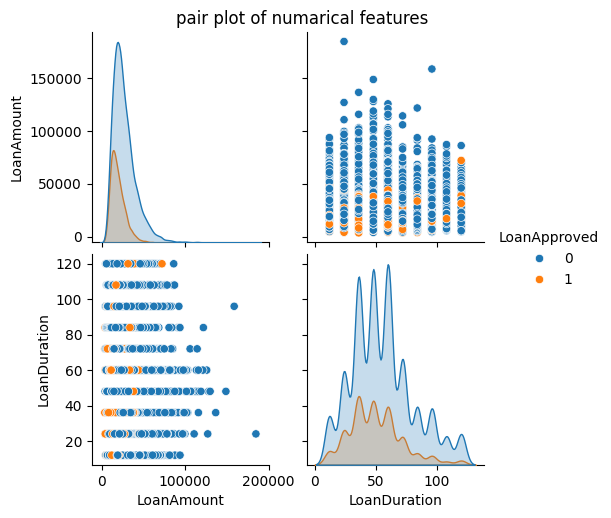

In [ ]:
sns.pairplot(df[["LoanAmount","LoanDuration","LoanApproved"]],hue="LoanApproved")
plt.suptitle("pair plot of numarical features",y=1.02)
plt.show()

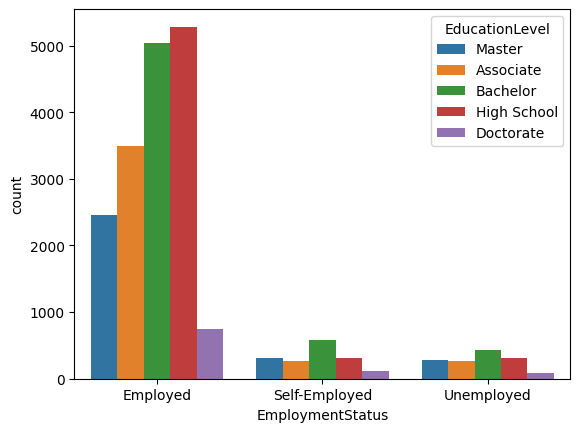

In [ ]:
sns.countplot(x="EmploymentStatus",hue="EducationLevel",data=df)
plt.show()

**1.Risk Score Regression:** To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

**2.Loan Approval:** To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

<ipython-input-16-17e2de1e3c3f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.barplot(x="LoanApproved",y="LoanAmount",data=df,palette="cool")


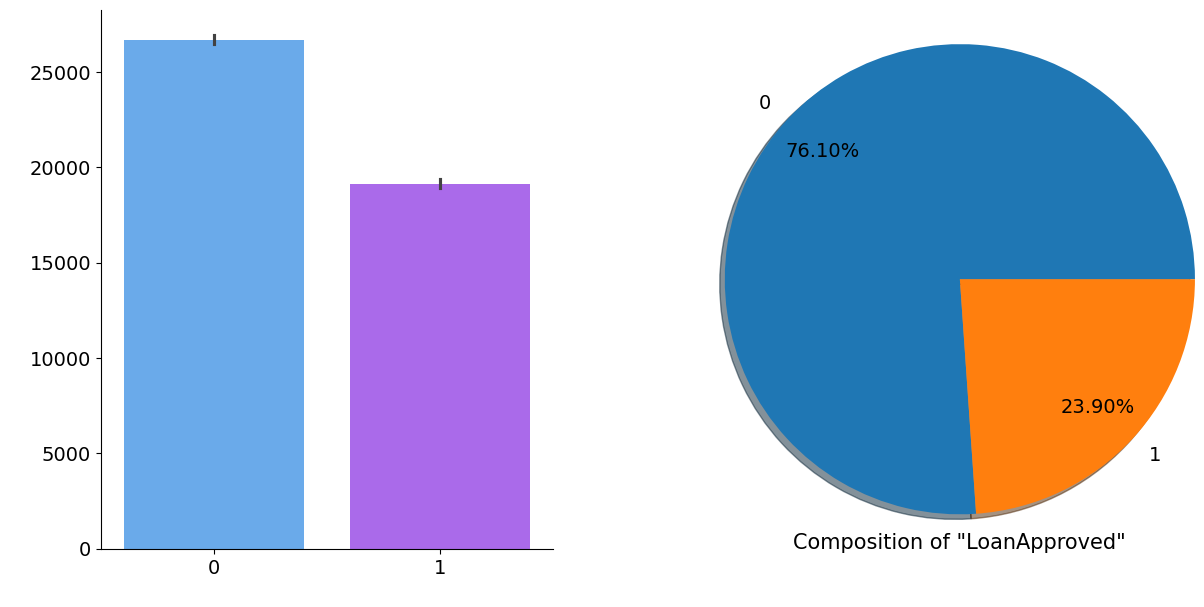

In [ ]:
plt.figure(figsize=(14,7))
ax1=plt.subplot(1,2,1)
cp=sns.barplot(x="LoanApproved",y="LoanAmount",data=df,palette="cool")
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)

#pieplot
ax2=plt.subplot(1,2,2)
plt.pie(x=df["LoanApproved"].value_counts(),
        labels=list(df["LoanApproved"].unique()),
        autopct="%2.2f%%",
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={"fontsize":14})
ax2.set_xlabel(" ")
plt.xlabel('Composition of "LoanApproved"',fontsize=15,labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

No need of  sampling since there are inly two categories in the target column and notb that much difference in the values.

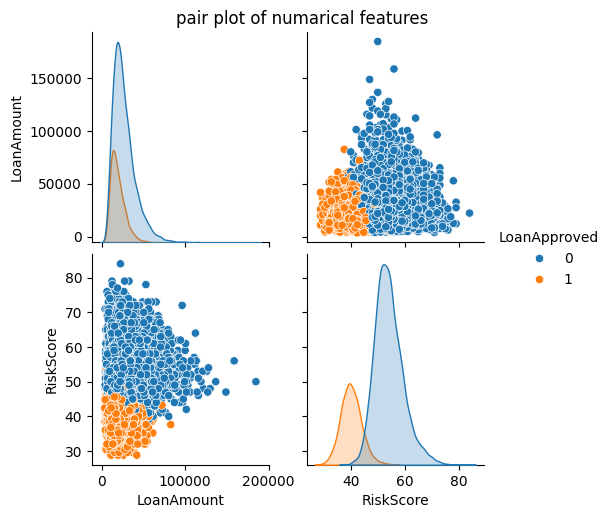

In [ ]:
sns.pairplot(df[["LoanAmount","RiskScore","LoanApproved"]],hue="LoanApproved")
plt.suptitle("pair plot of numarical features",y=1.02)
plt.show()

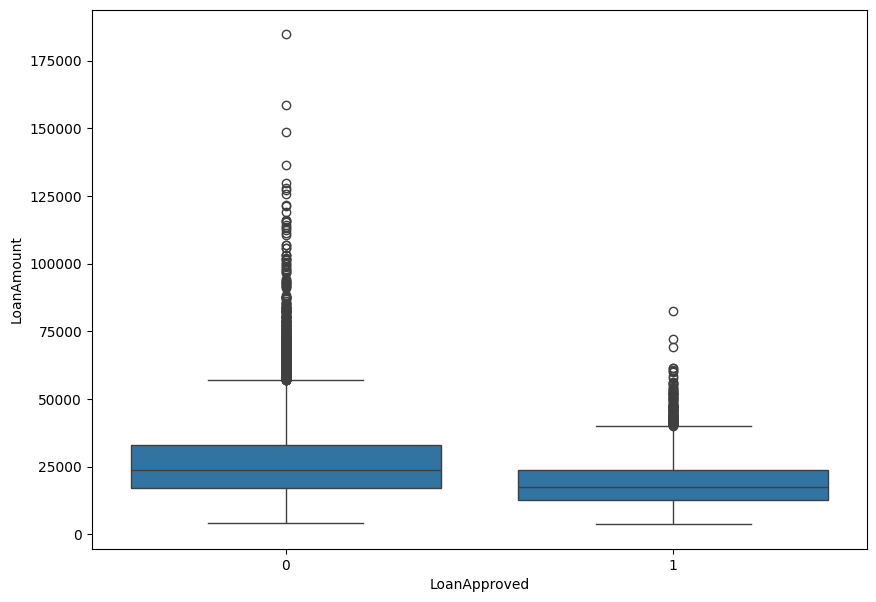

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x="LoanApproved",y="LoanAmount")
plt.show()

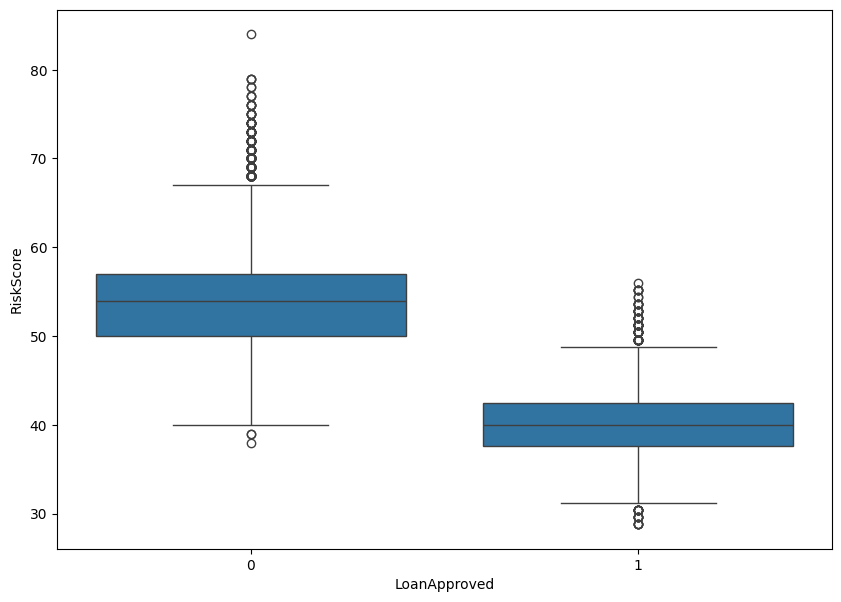

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x="LoanApproved",y="RiskScore")
plt.show()

#Datacleaning

## Handling Null/duplicates value

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


* No null values in this dataset


##Feature Engineering

In [ ]:
df["BankBalnce"]=df["SavingsAccountBalance"]+df["CheckingAccountBalance"]
df.drop("SavingsAccountBalance",axis=1,inplace=True)
df.drop("CheckingAccountBalance",axis=1,inplace=True)

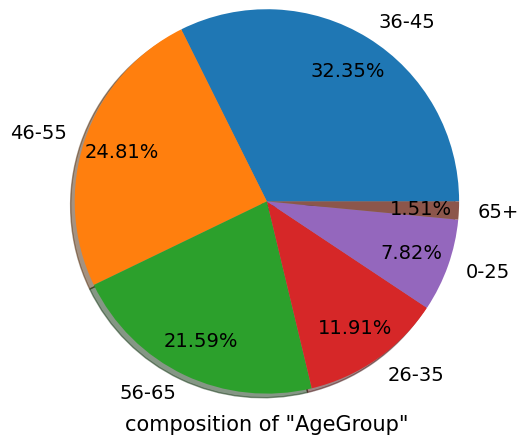

In [ ]:
df['AgeGroup']=pd.cut(df['Age'],bins=[0,25,35,45,55,65,100],labels=['0-25','26-35','36-45','46-55','56-65','65+'])

plt.pie(x=df['AgeGroup'].value_counts(),
labels=list(df["AgeGroup"].unique()),
autopct="%2.2f%%",
pctdistance=0.8,
shadow=True,
radius=1.3,
textprops={"fontsize":14})
plt.xlabel('composition of "AgeGroup"',fontsize=15,labelpad=20)
plt.show()

In [ ]:
df.drop("AgeGroup",axis=1,inplace=True)

In [ ]:
df[["year","month",'day']]=df["ApplicationDate"].str.split('-',expand=True)

df['year']=df["year"].astype(int)
df['month']=df["month"].astype(int)
df['day']=df["day"].astype(int)
df[["ApplicationDate","year","month","day"]]

,ApplicationDate,year,month,day
0,2018-01-01,2018,1,1
1,2018-01-02,2018,1,2
2,2018-01-03,2018,1,3
3,2018-01-04,2018,1,4
4,2018-01-05,2018,1,5
...,...,...,...,...
19995,2072-09-29,2072,9,29
19996,2072-09-30,2072,9,30
19997,2072-10-01,2072,10,1
19998,2072-10-02,2072,10,2


In [ ]:
df["year"].max()


2072

So this column contains  wrong information

In [ ]:
# the applicationdate feature hava errors.so drop it
df.drop(['ApplicationDate',"year",'month',"day"],axis=1,inplace=True)

##Encoding

In [ ]:
categorical_columns=df.select_dtypes(include=["object","category"]).columns.tolist()
print("categorical Columns:",categorical_columns)

categorical Columns: ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


## Ordinal Data
Many machine learning models.like decision trees and regression models.rely on the relative order of numaric values.by manually assinging meanful numbers,the model can better capture the relationship between the ordinal categories.

In [ ]:
df["EmploymentStatus"].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [ ]:
df["EmploymentStatus"]=df["EmploymentStatus"].replace({"Unemployed":0,"Self-Employed":1,"Employed":2})

<ipython-input-30-94bbeb2dd66d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["EmploymentStatus"]=df["EmploymentStatus"].replace({"Unemployed":0,"Self-Employed":1,"Employed":2})


In [ ]:
df["EmploymentStatus"].unique()

array([2, 1, 0])

In [ ]:
df["EducationLevel"].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [ ]:
df["EducationLevel"]=df["EducationLevel"].map({"High School":0,
                                               "Associate":1,
                                               "Bachelor":2,
                                               "Master":3,
                                               "Doctorate":4})

In [ ]:
df["EducationLevel"].unique()

array([3, 1, 2, 0, 4])

##Nominal Data

In [ ]:
le=LabelEncoder()
# Exclude the "ApplicationDate" column
for cols in df.select_dtypes("object").columns:
  if cols !="ApplicationDate":
    df[cols]=le.fit_transform(df[cols])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  int64  
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int64  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

#Data Transformation

## Skewed Data

##Histograms

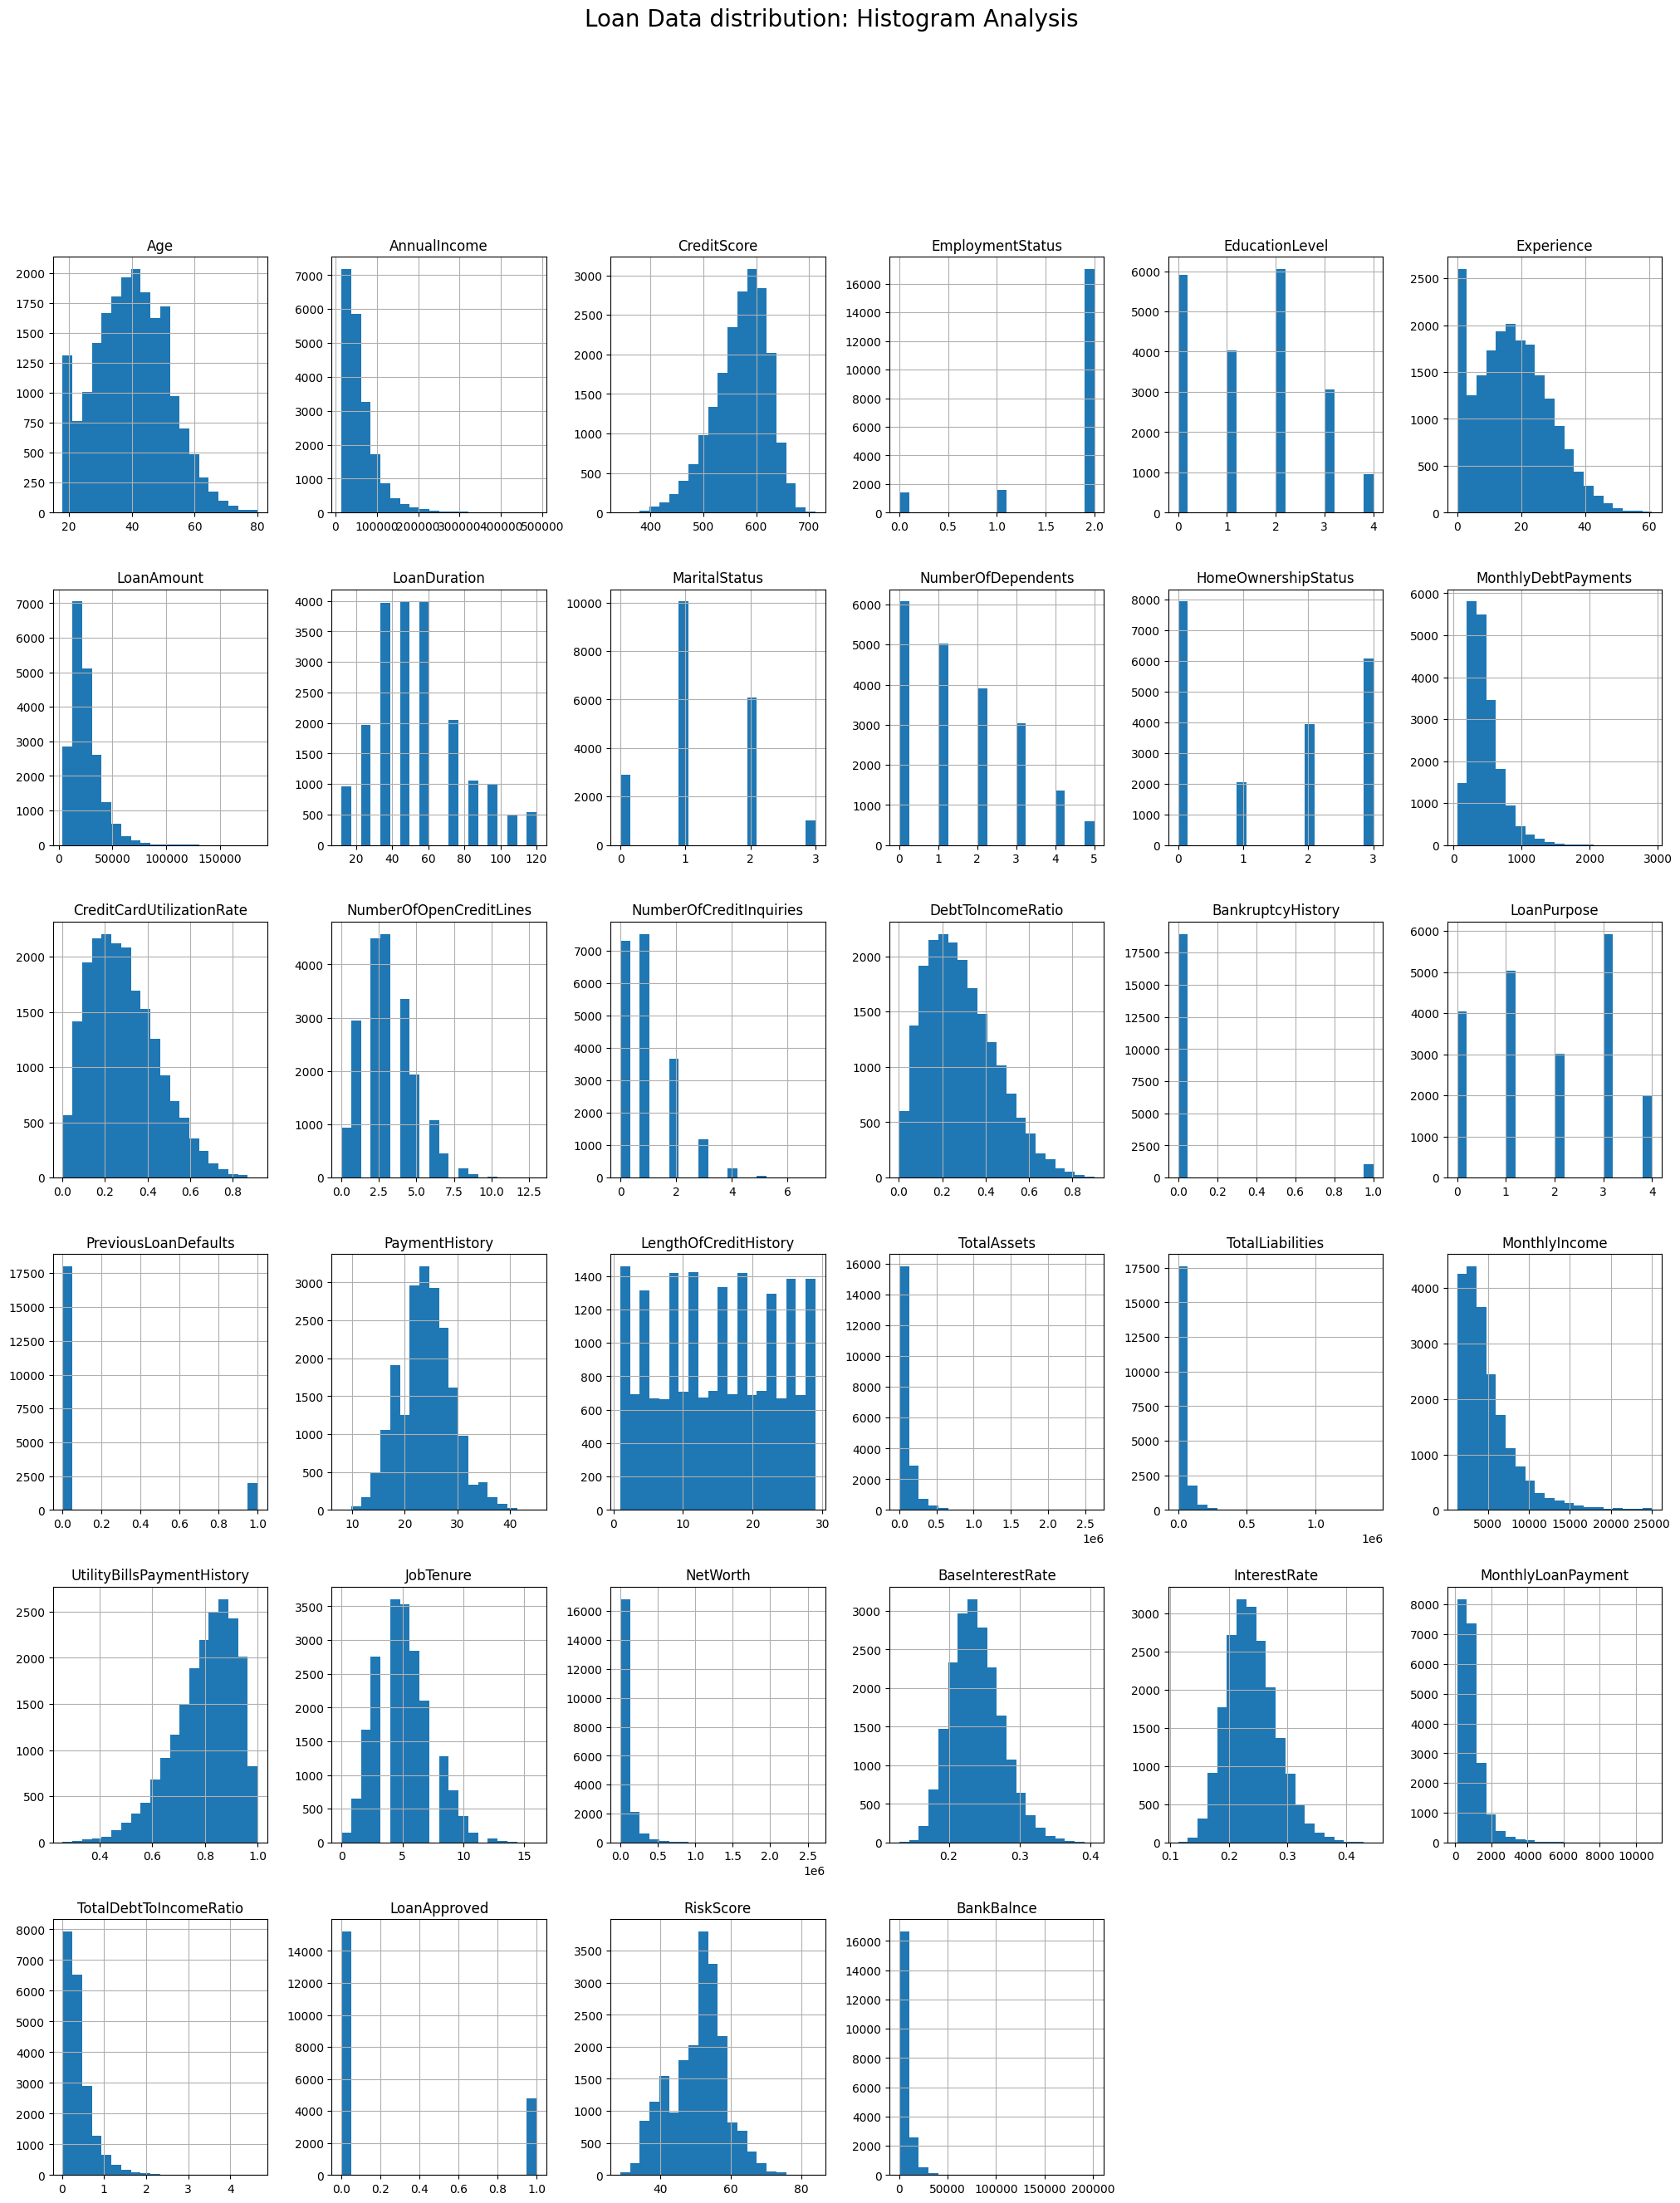

In [ ]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle("Loan Data distribution: Histogram Analysis",fontsize=20)
plt.show()

In [ ]:
# calculate for skewness for each column
skewness=df.skew()
#short the skewness  values in ascending order
sorted_skewness=skewness.sort_values(ascending=True)
#Dispaly the sorted skewness values
print(sorted_skewness)

EmploymentStatus             -2.455244
UtilityBillsPaymentHistory   -0.846234
CreditScore                  -0.596727
RiskScore                    -0.162062
LengthOfCreditHistory         0.002989
LoanPurpose                   0.025237
HomeOwnershipStatus           0.071497
Age                           0.185964
MaritalStatus                 0.202967
PaymentHistory                0.213465
EducationLevel                0.273155
Experience                    0.339981
JobTenure                     0.436452
BaseInterestRate              0.461850
InterestRate                  0.485491
DebtToIncomeRatio             0.593858
NumberOfOpenCreditLines       0.599662
CreditCardUtilizationRate     0.601131
NumberOfDependents            0.639919
LoanDuration                  0.651330
NumberOfCreditInquiries       1.012065
LoanApproved                  1.224086
MonthlyDebtPayments           1.653435
LoanAmount                    1.833688
MonthlyIncome                 1.992929
AnnualIncome             

In [ ]:
#create a copy of the original data for comparison
loan_df_copy=df.copy()
#log Transformation of skewed columns (eg.,AnnualIncome,loanAmount)
df['AnnualIncome']=np.log1p(df['AnnualIncome'])
df['LoanAmount']=np.log1p(df['LoanAmount'])

The log1p function in numpy stand for long(1+x)where"1p" refers to adding 1 to the input values before taking the logarithm.

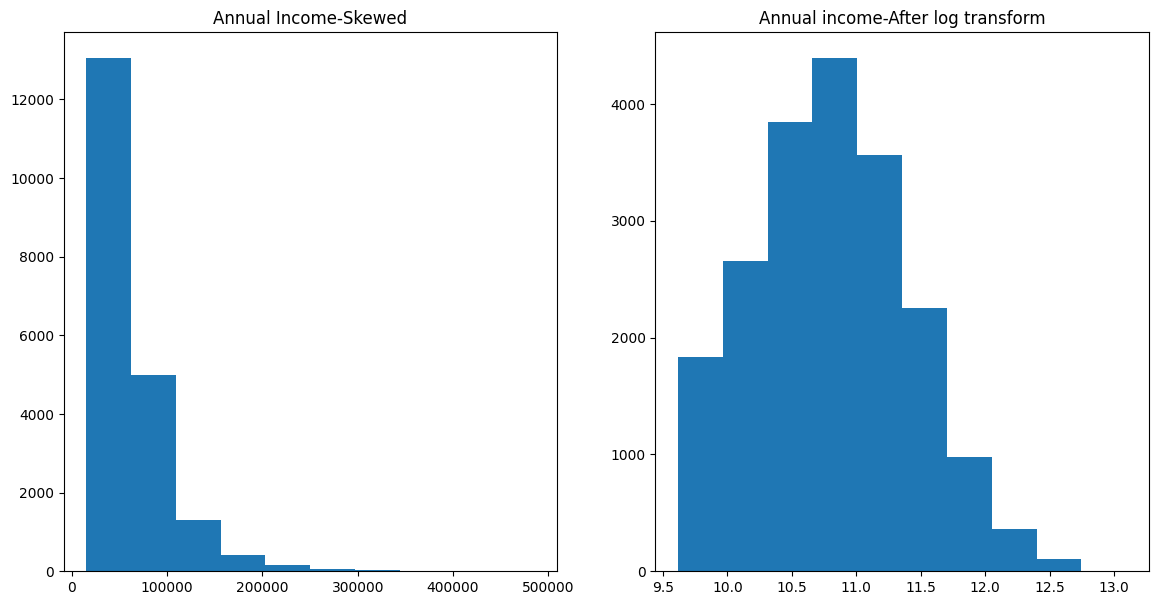

In [ ]:
plt.figure(figsize=(14,7))
#
ax1=plt.subplot(1,2,1)
cp=plt.hist(loan_df_copy['AnnualIncome'])
plt.title('Annual Income-Skewed')
#
ax2=plt.subplot(1,2,2)
plt.hist(df['AnnualIncome'])
plt.title('Annual income-After log transform')
plt.show()

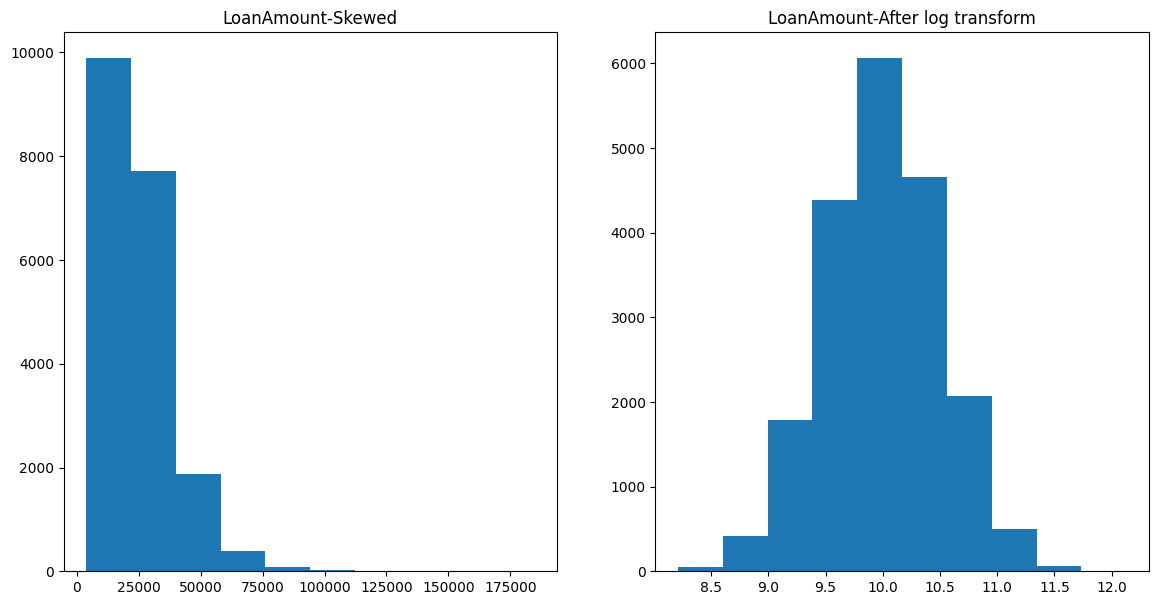

In [ ]:
plt.figure(figsize=(14,7))
#
ax1=plt.subplot(1,2,1)
cp=plt.hist(loan_df_copy['LoanAmount'])
plt.title('LoanAmount-Skewed')
#
ax2=plt.subplot(1,2,2)
plt.hist(df['LoanAmount'])
plt.title('LoanAmount-After log transform')
plt.show()

In [ ]:
#step1:select numaric columns, excluding "loanApproved"
numaric_columns=df.drop(columns=["LoanApproved"]).select_dtypes(include=["number"])
#step2: calculate skewness for numaric column
skewness=numaric_columns.skew()
#step3"Identfying columns with high skewness (threshold >1 or <-1)
highly_skewed_columns=skewness[abs(skewness)>1].index
#step 4: Apply log transformation using np.log1p for columns with high skewness
for col in highly_skewed_columns:
  # Create a new column with log-trasnformed values
  df[col]=np.log1p(df[col])
# check transformed columns
df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalnce
0,45,10.595359,617,1.098612,3,22,9.484405,48,1,2,...,0.724972,11,11.751383,0.199652,0.227590,6.042172,0.166427,0,49.0,9.086476
1,38,10.589358,628,1.098612,1,15,10.167619,48,2,1,...,0.935132,3,10.683042,0.207045,0.201077,6.678410,0.329198,0,52.0,8.998137
2,47,10.614597,570,1.098612,2,26,9.777244,36,1,2,...,0.872241,6,8.557567,0.217627,0.212548,6.503400,0.379913,0,52.0,7.485492
3,58,11.143093,545,1.098612,0,34,10.542680,96,2,1,...,0.896155,5,11.507440,0.300398,0.300911,6.955123,0.272389,0,54.0,7.970049
4,37,11.545054,594,1.098612,1,17,9.125327,36,1,1,...,0.941369,5,12.332793,0.197184,0.175990,5.802659,0.067855,1,36.0,8.785234


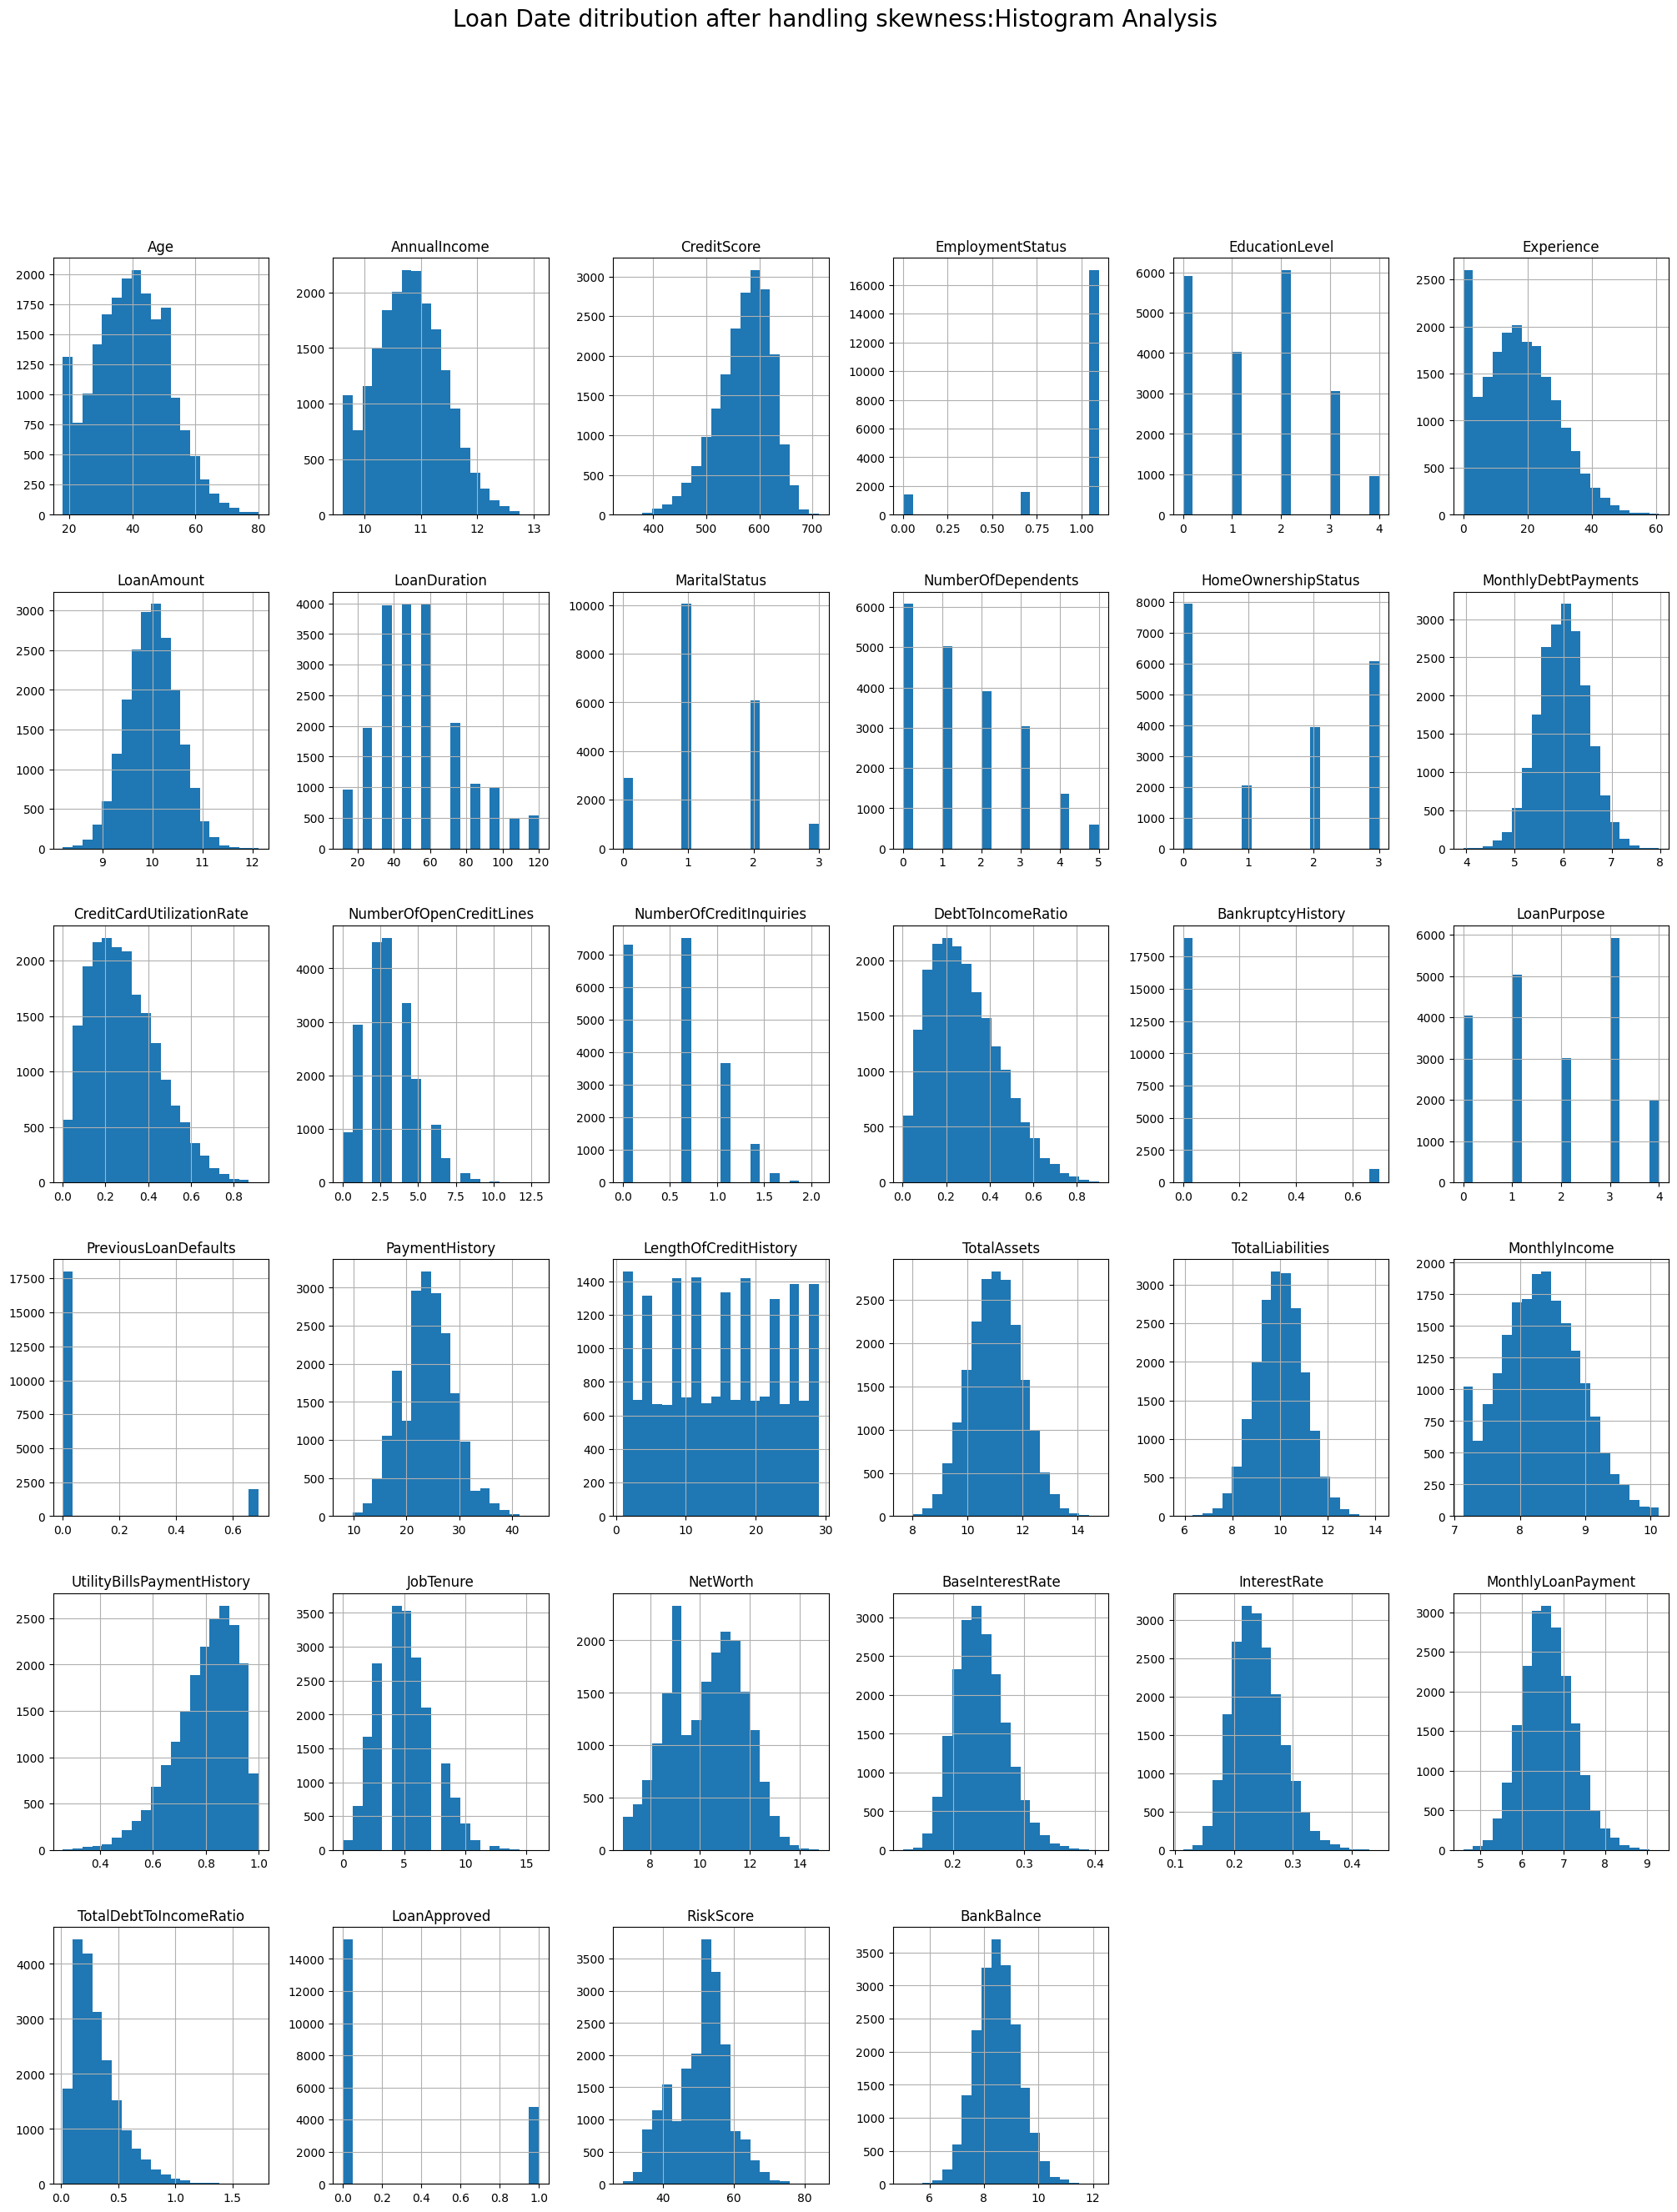

In [ ]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle("Loan Date ditribution after handling skewness:Histogram Analysis",fontsize=20)
plt.show()

## removing Unwanted features

### Based on correlation

After analyzing the correlations,you can remove:
* one among two highly correlated feature (between features themselves)
* Features with low correlation with the target variable.

<Axes: >

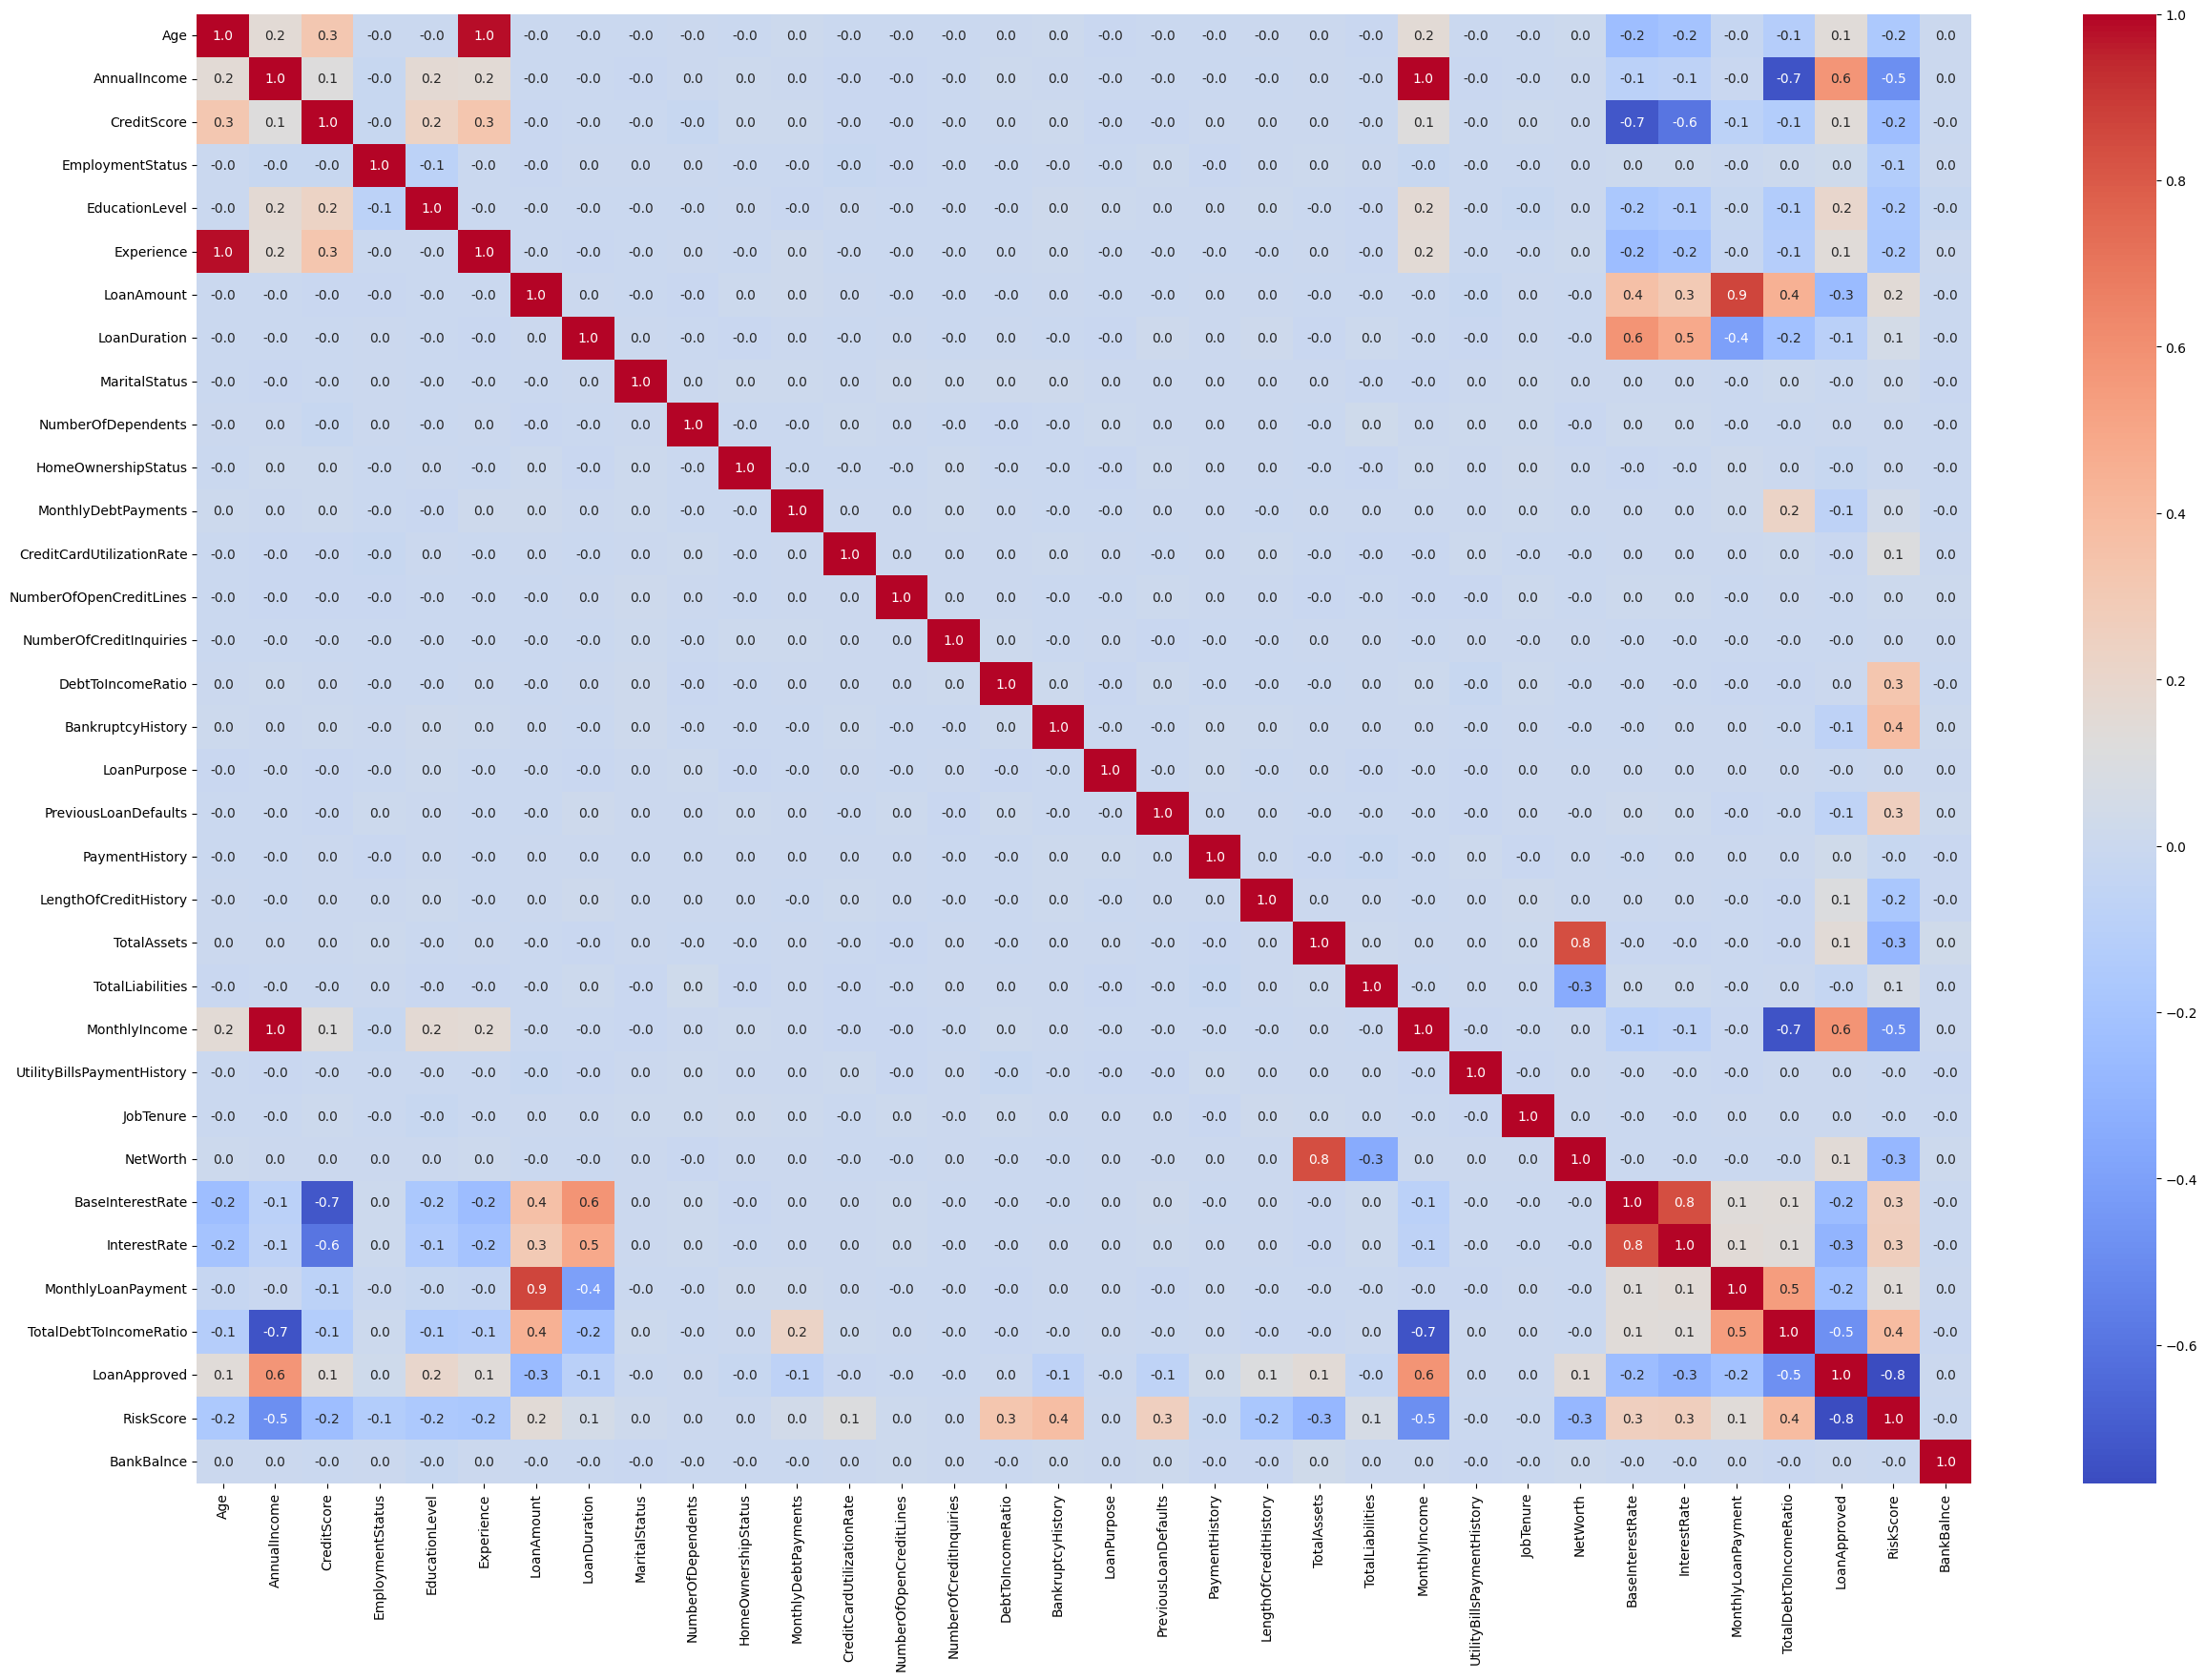

In [ ]:
plt.figure(figsize=(30,20))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt="0.01f",annot_kws=None)

In [ ]:
correlation_matrix=df.corr()

#set the correlation threshold
threshold=0.5

#find pairs of features with high correlation
highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
   for j in range(i):
#check if the absolute correlation exceeds the threshold
      if abs(correlation_matrix.iloc[i,j])> threshold:
        highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
#print all pairs of highly correlated featured
print(highly_correlated_pairs)

[('Experience', 'Age'), ('MonthlyIncome', 'AnnualIncome'), ('NetWorth', 'TotalAssets'), ('BaseInterestRate', 'CreditScore'), ('BaseInterestRate', 'LoanDuration'), ('InterestRate', 'CreditScore'), ('InterestRate', 'BaseInterestRate'), ('MonthlyLoanPayment', 'LoanAmount'), ('TotalDebtToIncomeRatio', 'AnnualIncome'), ('TotalDebtToIncomeRatio', 'MonthlyIncome'), ('TotalDebtToIncomeRatio', 'MonthlyLoanPayment'), ('LoanApproved', 'AnnualIncome'), ('LoanApproved', 'MonthlyIncome'), ('RiskScore', 'LoanApproved')]


features with a correaltion value sof 0.5 or higher(positive or negative) should be considerd for remoavl,as they are highly correlated

In [ ]:
df.drop(["Experience","AnnualIncome","TotalAssets","BaseInterestRate","MonthlyLoanPayment"],axis=1,inplace=True)

In [ ]:
df[['TotalDebtToIncomeRatio','MonthlyIncome']].corr()

#highly correlated

,TotalDebtToIncomeRatio,MonthlyIncome
TotalDebtToIncomeRatio,1.000000,-0.736617
MonthlyIncome,-0.736617,1.000000


In [ ]:
df.drop('TotalDebtToIncomeRatio',axis=1,inplace=True)

In [ ]:
#step1:Calculate the correlation of each feature with the target
corr_with_target=df.corr()['LoanApproved'].sort_values(ascending=False)

#step2:Set the threshold for low correlation (-0.1 to 0.1)
low_corr_features=corr_with_target[(corr_with_target > -0.05) & (corr_with_target < 0.05)]

#step3:print the list of features with low correlation
print('Features with correlation between -0.05 and 0.05:')
print(low_corr_features)

Features with correlation between -0.05 and 0.05:
PaymentHistory                0.030804
EmploymentStatus              0.024961
JobTenure                     0.004997
BankBalnce                    0.004973
UtilityBillsPaymentHistory    0.003303
NumberOfDependents            0.001717
DebtToIncomeRatio             0.000034
NumberOfOpenCreditLines      -0.004769
MaritalStatus                -0.006828
NumberOfCreditInquiries      -0.006837
LoanPurpose                  -0.007062
CreditCardUtilizationRate    -0.010466
HomeOwnershipStatus          -0.018135
TotalLiabilities             -0.033293
Name: LoanApproved, dtype: float64


In [ ]:
#Below features are very less correlated with the target variable:
df.drop(["JobTenure","UtilityBillsPaymentHistory","NumberOfDependents","DebtToIncomeRatio","NumberOfOpenCreditLines","NumberOfCreditInquiries","MaritalStatus","LoanPurpose"],axis=1,inplace=True)

the goal is to retain features are strongly correlated with the target variable(either positivly or negativly)and remove those that have litle or no relationship

In [ ]:
#step1:Calculate the correlation of each feature with the target
corr_with_target=df.corr()['RiskScore'].sort_values(ascending=False)

#step2:Set the threshold for low correlation (-0.1 to 0.1)
low_corr_features=corr_with_target[(corr_with_target > -0.05) & (corr_with_target < 0.05)]

#step3:print the list of features with low correlation
print('Features with correlation between -0.01 and 0.01:')
print(low_corr_features)

Features with correlation between -0.01 and 0.01:
MonthlyDebtPayments    0.037533
HomeOwnershipStatus    0.004454
BankBalnce            -0.001408
PaymentHistory        -0.016992
Name: RiskScore, dtype: float64


In [ ]:
df.drop(["MonthlyDebtPayments","HomeOwnershipStatus","PaymentHistory","BankBalnce"],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Age', 'CreditScore', 'EmploymentStatus', 'EducationLevel',
       'LoanAmount', 'LoanDuration', 'CreditCardUtilizationRate',
       'BankruptcyHistory', 'PreviousLoanDefaults', 'LengthOfCreditHistory',
       'TotalLiabilities', 'MonthlyIncome', 'NetWorth', 'InterestRate',
       'LoanApproved', 'RiskScore'],
      dtype='object')

In [ ]:
df.drop(["LoanDuration"],axis=1,inplace=True)

In [ ]:
df.drop(["EducationLevel"],axis=1,inplace=True)

In [ ]:
df.drop(["Age"],axis=1,inplace=True)

In [ ]:
df.columns

Index(['CreditScore', 'EmploymentStatus', 'LoanAmount',
       'CreditCardUtilizationRate', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory', 'TotalLiabilities',
       'MonthlyIncome', 'NetWorth', 'InterestRate', 'LoanApproved',
       'RiskScore'],
      dtype='object')

###PCA

PCA reduces number of features (diamension)in as dataset
* Principle companents:These are new features crated by PCA.Each components is a linear combosition of the original features,and they ranked on the amount of variance they explane in the data

In [ ]:
# Apply PCA
pca=PCA(n_components=5)# You can change the number of components to ratain
loan_pca=pca.fit_transform(df)

# Create data frame with the pca results
loan_pca_df=pd.DataFrame(loan_pca,columns=[f"Pc{i+1}"for i in range(loan_pca.shape[1])])

#step 5: combine the pca compents with the original dataframe if needed
loan_pca_final_df=pd.concat([df.reset_index(drop=True),loan_pca_df],axis=1)

# Now loan_pca_final_of contains the original data along with the pca compents
loan_pca_df.head()

,Pc1,Pc2,Pc3,Pc4,Pc5
0,45.415168,-5.118133,-3.169741,1.365916,0.452133
1,56.295083,-6.876061,-0.186502,0.848532,-0.549209
2,-1.650936,5.432465,4.699554,-2.103498,1.017684
3,-26.719513,-5.348505,-0.664767,1.748307,-0.831976
4,22.939609,17.472947,-6.044662,1.258010,0.367145


##Scaling

Standardization and normalization are two common techniques used in data preproccessing to scale featurs

###Standardization

Standardization transforms data to have a mean of 0 and standard deveation of 1.This is done by substracting the mean of the data and diving by the standard deviation.

Standardization is usful whwn your data follows a normal distributiobn or if using machine learning algorithms that assue normally distributted data(eg.linear regrresion ,logistic regression ,SVM,etc)t works well with algorithms that relay on the distance between data points (e.g.,K-NN,PCA)

In [ ]:
# Create a copy of the original data for comparison
loan_scales_df=df.copy()
#Select numaric columns,excluding "LoanApproval"
numaric_columns=df.drop(columns=["LoanApproved"]).select_dtypes(include=["number"]).columns
# Initialize the standardScalar
scalar=StandardScaler()

# Apply the scalar only to the numaric columns
loan_scales_df[numaric_columns]=scalar.fit_transform(df[numaric_columns])
loan_scales_df.head()

,CreditScore,EmploymentStatus,LoanAmount,CreditCardUtilizationRate,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalLiabilities,MonthlyIncome,NetWorth,InterestRate,LoanApproved,RiskScore
0,0.890021,0.371144,-1.014008,0.425792,-0.235154,-0.333426,-0.711630,-0.136881,-0.324366,1.020941,-0.272968,0,-0.227149
1,1.105724,0.371144,0.343015,-1.242602,-0.235154,-0.333426,-0.711630,-0.828648,-0.334247,0.287206,-0.901165,0,0.158551
2,-0.031618,0.371144,-0.432362,-0.932273,-0.235154,-0.333426,0.841287,1.765237,-0.292687,-1.172566,-0.629370,0,0.158551
3,-0.521852,0.371144,1.087972,-0.117617,-0.235154,-0.333426,-0.592175,-1.408173,0.577602,0.853401,1.464331,0,0.415684
4,0.439006,0.371144,-1.727221,0.213746,-0.235154,-0.333426,1.438563,-0.240858,1.239575,1.420252,-1.495584,1,-1.898515


##Normalization:

Normaliziaton transforms data to a specific range,usally[0.1]or[-1,1].The idea is to rescale data without disorting the diffrence in the range of values

Normaization is prefferd when you know that the dta does not follow a normal distribution and when you need to constyrain the data within a fixed range.It is commenly used in alogorithms such as neural networks and k-means clustering, where the maganitude of the matters

#Handling Outliers

##Boxplots

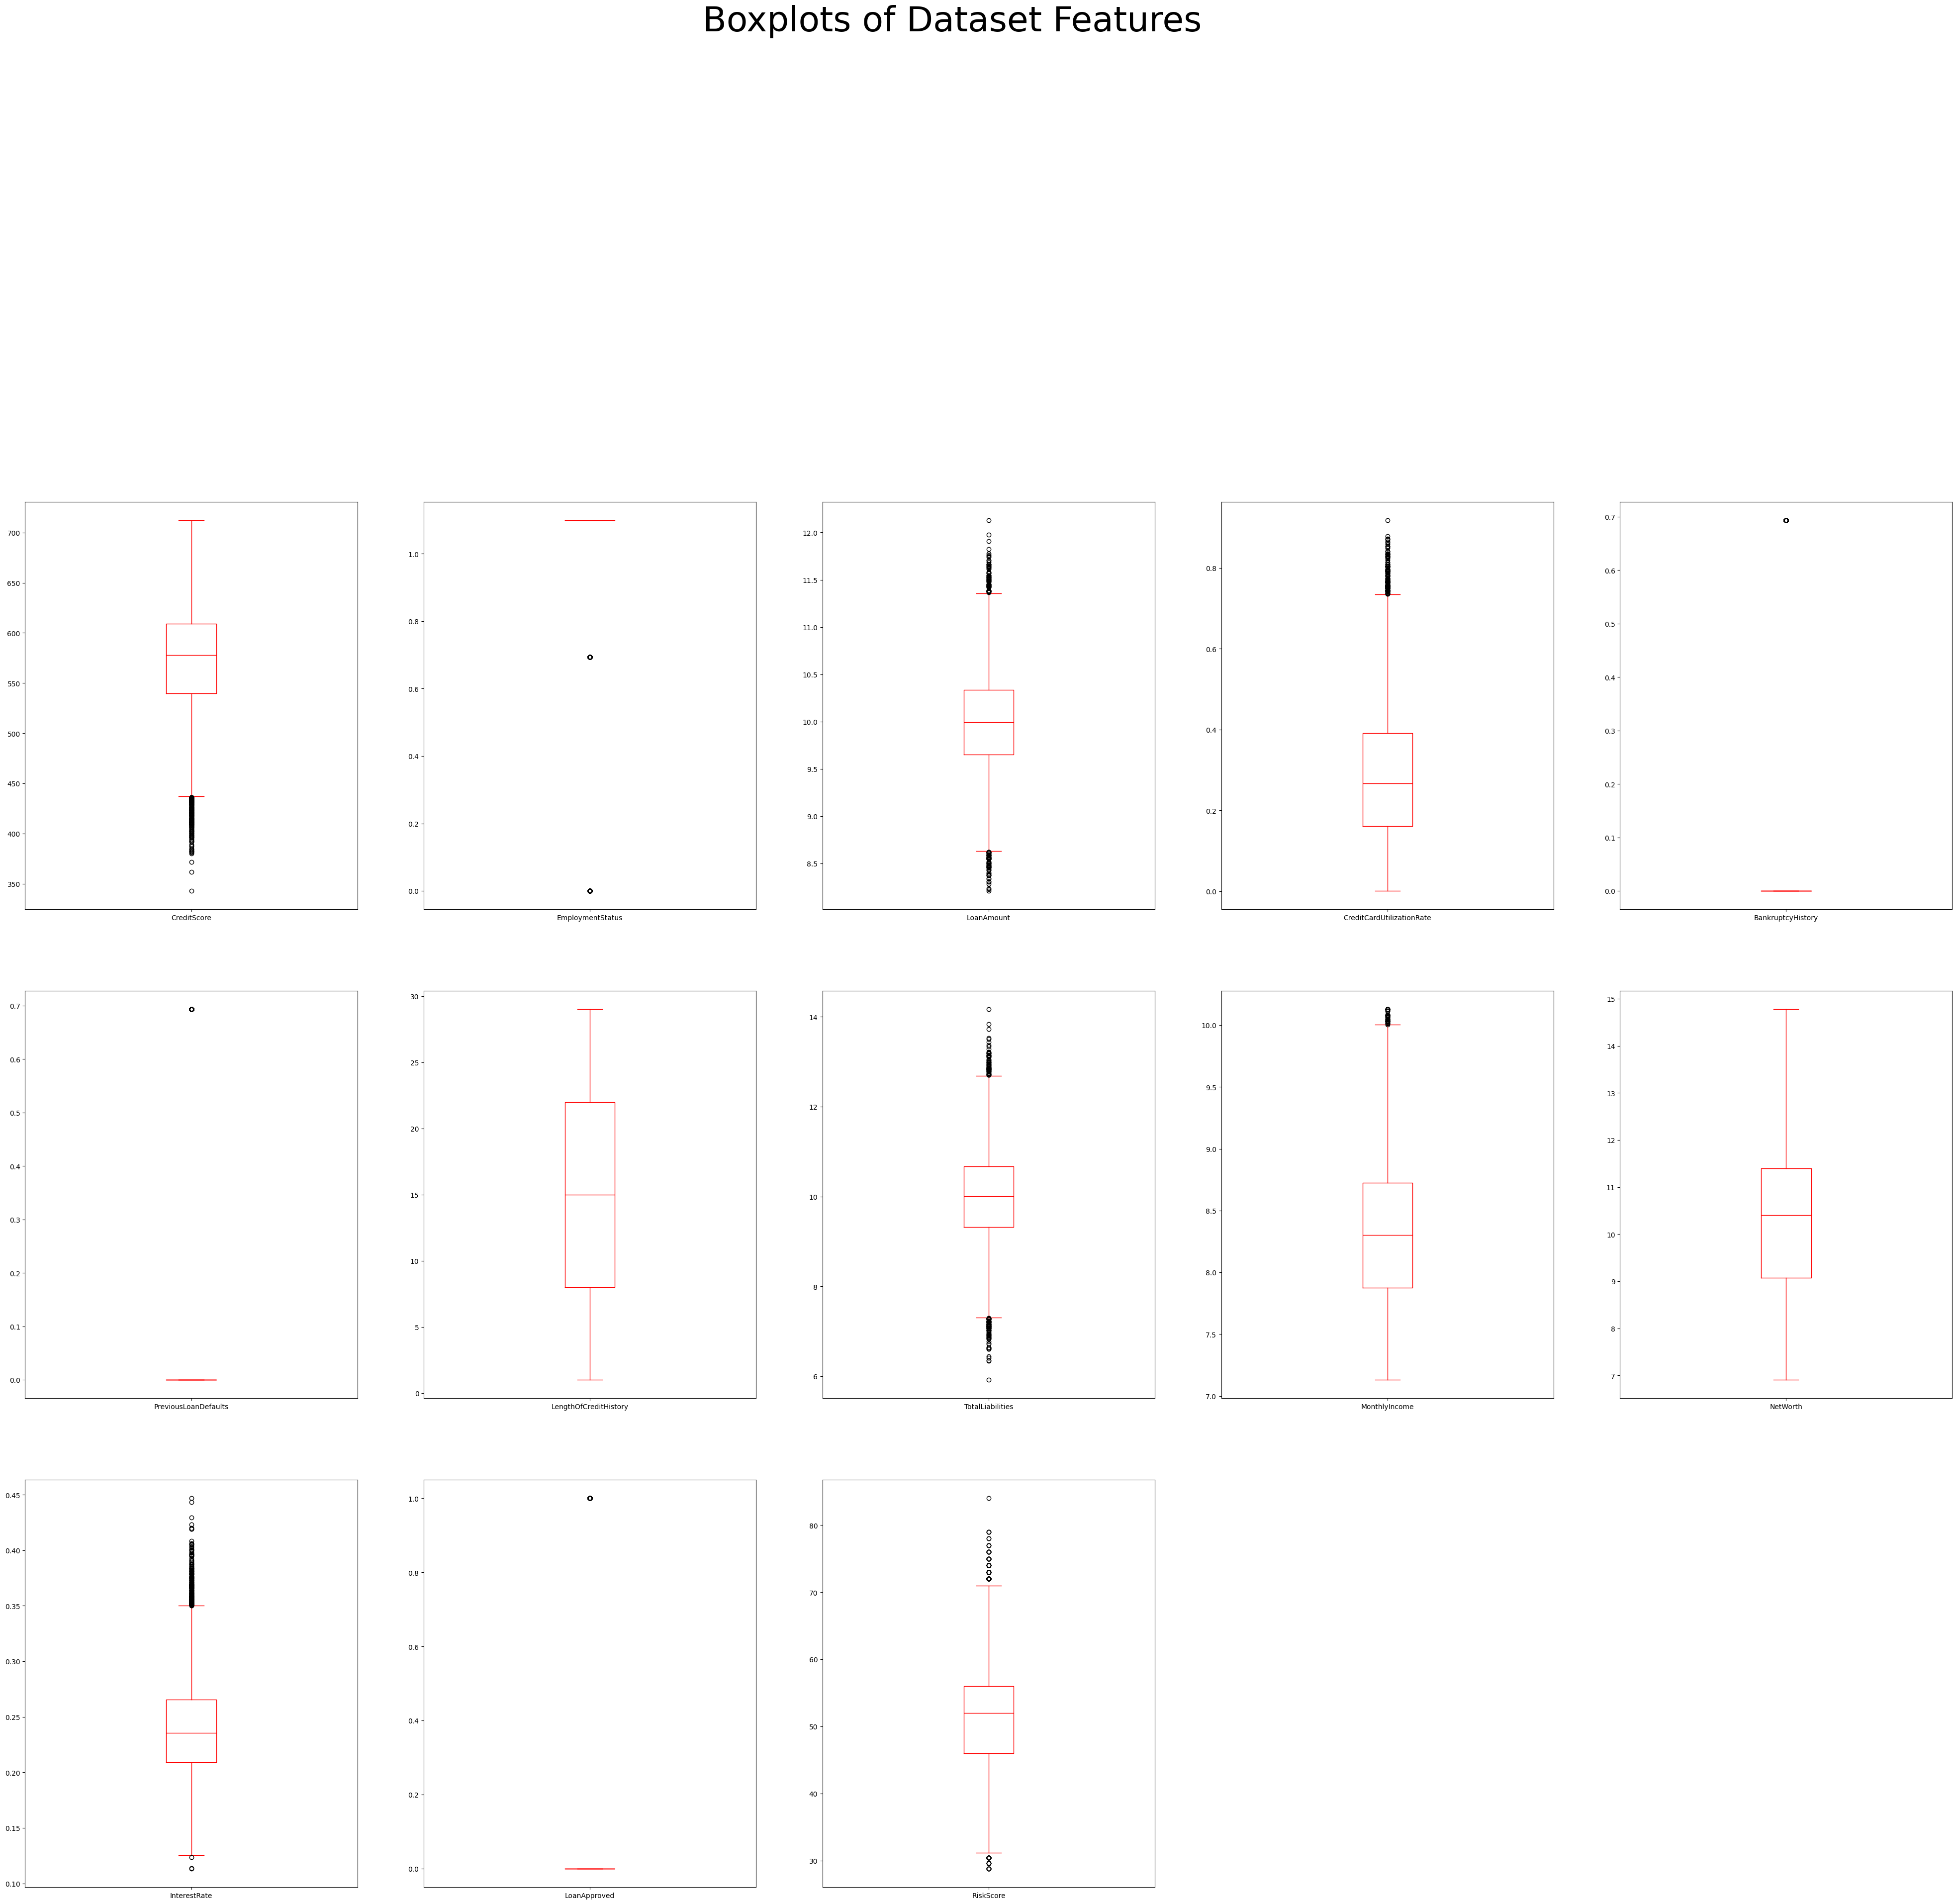

In [ ]:
df.plot(kind="box",subplots=True,layout=(8,5),figsize=(50,100),color="red")
plt.suptitle("Boxplots of Dataset Features ",fontsize=50)
plt.show()

In [ ]:
#crete a copy of the original data for comparison
loan_df_copy=df.copy()

def remove_outliers_iqr(df,exclude):
    # Loop through numeric columns
    for column in df.select_dtypes(include=['number']):
      if column in exclude_columns:
        continue #skip excluded columns

      Q1=df[column].quantile(0.25)
      Q3=df[column].quantile(0.75)
      IQR=Q3-Q1

      #define outlier bounds
      lower_bound=Q1-1.5*IQR
      upper_bound=Q3+1.5*IQR

      #filter out the outliers
      df=df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]

    return df
#define the columns to exclude
exclude_columns=['LoanApproved','RiskScore']

#remove outliers
df=remove_outliers_iqr(df,exclude_columns)

#print shapes of the data before amd after removing outliers
print('shape of data before removing outliers:',loan_df_copy.shape)
print('shape of data after removing outliers:',df.shape)
print('number of outliers removed :',loan_df_copy.shape[0]-df.shape[0])

shape of data before removing outliers: (20000, 13)
shape of data after removing outliers: (13849, 13)
number of outliers removed : 6151


#Model Training and Evaluvation

##Regression modeling

Risk Score regression: To predict continuos risk score associated with each indivituals likehood of loan default or financial instability

In [ ]:
x1=df.drop("RiskScore",axis=1)
y1=df[["RiskScore"]]

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=41,test_size=0.2)

print("Shape of training features:",x1_train.shape)
print("Shape of training features:",x1_test.shape)
print("Shape of training target:",y1_train.shape)
print("Shape of testing targrt:",x1_test.shape)


Shape of training features: (11079, 12)
Shape of training features: (2770, 12)
Shape of training target: (11079, 1)
Shape of testing targrt: (2770, 12)


In [ ]:
models={
    "Linear_regression":LinearRegression(),
    "RandomForest_Regression":RandomForestRegressor(),
    "GradientBoosing_Regressor":GradientBoostingRegressor(),
    "DecisionTree_Regressor":DecisionTreeRegressor(),
    "SVM":SVR(),
    #"MLP_Regressor":MLPRegressor(max_iter=500),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "ExtraTreeRegressor":ExtraTreesRegressor(),
    "BaggingRegressor":LGBMRegressor(),
    #"CatBoostregressor":CatBoostregressor(),
    "XGBRegressor":XGBRegressor()
}

In [ ]:
#Dictionary to store results
results={'Model':[],'MSE':[],'MAE':[],'R2':[]}
#Loop through the models,train them,and calculate the metrics
for model_name,model in models.items():
    #Train the model
    model.fit(x1_train,y1_train)

    #make predictions
    y1_pred=model.predict(x1_test)

    # calculate metrics
    mse=mean_squared_error(y1_test,y1_pred)
    mae=mean_absolute_error(y1_test,y1_pred)
    r2=r2_score(y1_test,y1_pred)

    #store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R2'].append(r2)
    #Convert results to a DataFrame
results_df=pd.DataFrame(results)
# Display the results
results_df


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1800
[LightGBM] [Info] Number of data points in the train set: 11079, number of used features: 9
[LightGBM] [Info] Start training from score 48.873328


,Model,MSE,MAE,R2
0,Linear_regression,9.732550,2.532444,0.793408
1,RandomForest_Regression,7.334583,2.272003,0.844310
2,GradientBoosing_Regressor,6.966003,2.253033,0.852133
3,DecisionTree_Regressor,14.290931,2.982744,0.696648
4,SVM,43.158037,5.099271,0.083889
5,AdaBoostRegressor,7.892497,2.425524,0.832467
6,ExtraTreeRegressor,7.581780,2.308750,0.839062
7,BaggingRegressor,7.042339,2.250293,0.850513
8,XGBRegressor,7.924291,2.344901,0.831792


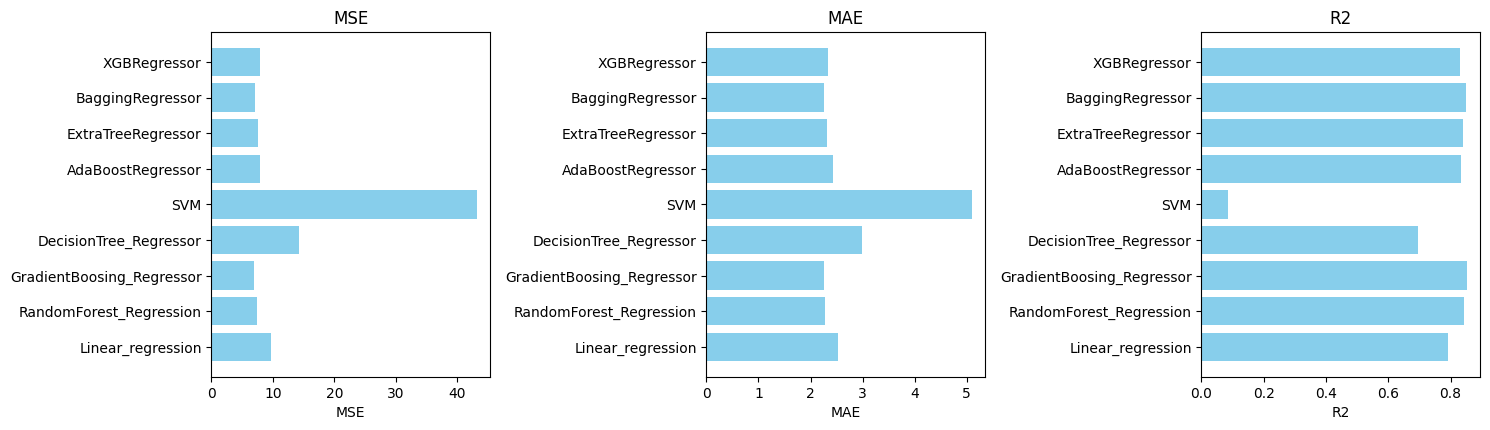

In [ ]:
# ploting each metrics
metrics=["MSE","MAE","R2"]

plt.figure(figsize=(15,8))
for i,metric in enumerate(metrics):
  plt.subplot(2,3,i+1)
  plt.barh(results_df["Model"],results_df[metric],color="skyblue")
  plt.title(metric)
  #plt.xlim(0,1)
  plt.xlabel(metric)

plt.tight_layout()
plt.show()

###regression on scaled data

In [ ]:
x1s=loan_scales_df.drop("RiskScore",axis=1)
y1s=loan_scales_df[["RiskScore"]]
x1s_train,x1s_test,y1s_train,y1s_test=train_test_split(x1s,y1s,random_state=42,test_size=0.2)
#Dictionary to store results
results={'Model':[],'MSE':[],'MAE':[],'R2':[]}

for model_name,model in models.items():
    #Train the model
    model.fit(x1s_train,y1s_train)

    #make predictions
    y1s_pred=model.predict(x1s_test)

    # calculate metrics
    mse1=mean_squared_error(y1s_test,y1s_pred)
    mae1=mean_absolute_error(y1s_test,y1s_pred)
    r21=r2_score(y1s_test,y1s_pred)

    #store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R2'].append(r21)
#Convert results to a DataFrame
results_df1=pd.DataFrame(results)

#Display the results
#results_df1

#Sort by accuracy
results_df1=results_df1.sort_values(by="MSE",ascending=True)

#Disp;ay the stored dataframe with background gradient
results_df1.style.background_gradient("Blues")


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1796
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 12
[LightGBM] [Info] Start training from score 0.009876


,Model,MSE,MAE,R2
0,Linear_regression,7.924291,2.344901,0.840971
1,RandomForest_Regression,7.924291,2.344901,0.874773
2,GradientBoosing_Regressor,7.924291,2.344901,0.888924
3,DecisionTree_Regressor,7.924291,2.344901,0.762712
4,SVM,7.924291,2.344901,0.863034
5,AdaBoostRegressor,7.924291,2.344901,0.829420
6,ExtraTreeRegressor,7.924291,2.344901,0.876637
7,BaggingRegressor,7.924291,2.344901,0.887364
8,XGBRegressor,7.924291,2.344901,0.876346


Based on the analysis of the loan approval dataset for predicting  the riskscore,the GradientBoostregressor model demonstrated the best perfomance among the tested models.

###Classifiaction modeling
Binary loan approaval Classification: To determine the binary outcome of loan approval,indicating whether an applicant is likely  to be approved or denied for a loan.

In [ ]:
#Convert "LaonApproved" fro float to int
df["LoanApproved"]=df["LoanApproved"].astype(int)

x=df.drop("LoanApproved",axis=1)
y=df[["LoanApproved"]]

In [ ]:
df[["LoanApproved"]].value_counts()

,count
LoanApproved,
0,10254
1,3595


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=41,test_size=0.2)

print("Shape of training features:",x_train.shape)
print("Shape of training features:",x_test.shape)
print("Shape of training target:",y_train.shape)
print("Shape of testing targrt:",x_test.shape)

Shape of training features: (11079, 12)
Shape of training features: (2770, 12)
Shape of training target: (11079, 1)
Shape of testing targrt: (2770, 12)


In [ ]:
clas_models={"lr":LogisticRegression(max_iter=500),
             "rfc":RandomForestClassifier(),
             "dtc":DecisionTreeClassifier(),
             "knn":KNeighborsClassifier(n_neighbors=11),
             "svm":SVC(kernel="linear"),
             "gcb":GradientBoostingClassifier(random_state=0,learning_rate=0.45),
             "etc":ExtraTreesClassifier(),
             "nb":GaussianNB()}

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Dictionary to store results
results={'Model':[],'accuracy':[],'precision':[],'reacall':[],'F1-Score':[]}

for model_name,model in clas_models.items():
    #Train the model
    model.fit(x_train,y_train)
    model_pred=model.predict(x_test)


    # calculate metrics
    accuracy=mean_squared_error(y_test,model_pred)
    precision=mean_absolute_error(y_test,model_pred)
    recall=recall_score(y_test,model_pred)
    f1=f1_score(y_test,model_pred)

    #store results in the dictionary
    results['Model'].append(model)
    results['accuracy'].append(accuracy)
    results['precision'].append(precision)
    results['reacall'].append(recall)
    results['F1-Score'].append(f1)
#Convert results to a DataFrame
results_df1=pd.DataFrame(results)

#dispaly the results in a table
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

,Model,MSE,MAE,R2
0,Linear_regression,9.732550,2.532444,0.793408
1,RandomForest_Regression,7.334583,2.272003,0.844310
2,GradientBoosing_Regressor,6.966003,2.253033,0.852133
3,DecisionTree_Regressor,14.290931,2.982744,0.696648
4,SVM,43.158037,5.099271,0.083889
5,AdaBoostRegressor,7.892497,2.425524,0.832467
6,ExtraTreeRegressor,7.581780,2.308750,0.839062
7,BaggingRegressor,7.042339,2.250293,0.850513
8,XGBRegressor,7.924291,2.344901,0.831792


###Classifiaction on scaled data

In [ ]:
x2s=loan_scales_df.drop("LoanApproved",axis=1)
y2s=loan_scales_df[["LoanApproved"]]
x2s_train,x2s_test,y2s_train,y2s_test=train_test_split(x2s,y2s,random_state=41,test_size=0.2)
results={'Model':[],'accuracy':[],'precision':[],'reacall':[],'F1-Score':[]}

for model_name,model in clas_models.items():
    #Train the model
    model.fit(x2s_train,y2s_train)
    model_pred=model.predict(x2s_test)


    # calculate metrics
    accuracy2=mean_squared_error(y2s_test,model_pred)
    precision2=mean_absolute_error(y2s_test,model_pred)
    recall2=recall_score(y2s_test,model_pred)
    f12=f1_score(y2s_test,model_pred)

    #store results in the dictionary
    results['Model'].append(model)
    results['accuracy'].append(accuracy2)
    results['precision'].append(precision2)
    results['reacall'].append(recall2)
    results['F1-Score'].append(f12)

    #Convert results to a DataFrame
results_df2=pd.DataFrame(results)

#sort by accuracy
results_df2=results_df2.sort_values(by="accuracy",ascending=False)

# Display the sorted Dataframes with background gradient
results_df2.style.background_gradient("Blues")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

,Model,accuracy,precision,reacall,F1-Score
7,GaussianNB(),0.042750,0.042750,0.920467,0.910330
2,DecisionTreeClassifier(),0.018000,0.018000,0.958643,0.961702
3,KNeighborsClassifier(n_neighbors=11),0.014500,0.014500,0.949099,0.968615
1,RandomForestClassifier(),0.009500,0.009500,0.972428,0.979701
6,ExtraTreesClassifier(),0.008500,0.008500,0.975610,0.981857
4,SVC(kernel='linear'),0.005250,0.005250,0.987275,0.988848
0,LogisticRegression(max_iter=500),0.005000,0.005000,0.987275,0.989373
5,"GradientBoostingClassifier(learning_rate=0.45, random_state=0)",0.002750,0.002750,0.990456,0.994146


Based on evluvation of the classification models for predicting loan approval,the GradientBoostClassifier with a learning rate of 0.45 and random state set to 0 emergened as the best perfoming model.it achived the highest accuracy and consistently storng results across prescion,recall and F1-Score, making it the most relable modle for classifying whether a loan is approved or not in the loan dataset.

## pickle file

In [ ]:
import pickle
#save the regression model
r_model=GradientBoostingRegressor()
r_model.fit(x1s_train,y1s_train.values.ravel())
with open('regression_model.pkl','wb') as file:
  pickle.dump(r_model,file)

#save the classification model
c_model=GradientBoostingClassifier(random_state=0,learning_rate=0.45)
c_model.fit(x2s_train,y2s_train.values.ravel())
with open("classification_model.pkl","wb")as file:
   pickle.dump(r_model,file)
